<h1 style='color:red'>Telecom Churn Case Study

<h3 style='color:green'> Machine Learning 2

`Submission Ganesh Nagappa Shetty & Harish Dave`

## Problem Statement
- Telecommunications industry experiences an average of 15-25% annual churn rate. 
- It costs 5-10 times more to acquire a new customer than to retain an existing one. 
- Customer retention is therefore a major focus area.
- Analyse customer data of a telecom firm. Build predictive models to identify customers at high risk of churn and identify the main indicators of churn.
- In the Indian and the Southeast Asian market, 80-20 rule plays out in the telecom churn. For instance, approximately 80% of revenue comes from the top 20% customers. These top 20% are the so called high-value customers. Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.
- After filtering the high-value customers, you should get about 29.9k rows.


## Objective
- To reduce customer churn, need to predict which customers are at high risk of churn.
- Retaining high value customers is key requirement.
- Churn prediction is usually more critical for prepaid customers. This must be taken care while defining churn.
- Usage-based definition to define churn
- Predict the churn in the last (i.e. the ninth) month using features from the first three months.

## Goals
1. Predict whether a high-value customer will churn or not
2. Identify important variables that are strong predictors of churn

### Table of Contents
<br>**1.Importing & Data Understanding**
<br>**2. Data Cleaning**
    <br> 2.1 DatetimeIndex
    <br> 2.2 Filter High Value Customers
    <br> 2.3 Tag Churners
    <br> 2.4 Handling of missing values
    <br> 2.5 Churn imbalance
    <br> 2.6 Outlier Analysis
<br> **3. EDA and Data Visualization**
<br> **4. Goal-1: Churn Prediction**
    <br> 4.1 Derive New Features
    <br> 4.2 Train Test Split
    <br> 4.3 PCA for Dimensionality Reducion
    <br> 4.4 Model-1 Churn Prediction: PCA, Logistic Regression, Class Weight Balanced
    <br> 4.5 Model-2 Churn Prediction: PCA, Logistic Regression, Hyper Parameter Tuning
    <br> 4.6 Model-3 Churn Prediction: Undersampling, PCA, Logistic Regression
    <br> 4.7 Model-4 Churn Prediction: Oversampling, PCA, Logistic Regression
    <br> 4.8 Model-5 Churn Prediction: SMOTE, PCA, Logistic Regression
    <br> 4.9 Model-6 Churn Prediction: PCA, Random Forest, Class Weight Balanced, Hyper Parameter Tuning
    <br> 4.10 Summary: Goal-1 Churn Prediction
<br>**5. Goal-2: Identify important predictor attributes**
    <br> 5.1 Logistic Regression without PCA
    <br> 5.2 Decision Trees
    <br> 5.3 Random Forest
    <br> 5.4 Important Features 
<br>**6. Conclusion & Recommendations**

## 1: Importing and Data Understanding

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Necessary Libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
font = {'family' : 'DejaVu Sans','size'   : 12}
%matplotlib inline

In [2]:
# Importing Telecom Churn data
telecom = pd.read_csv('telecom_churn_data.csv')

# First Few Lines of data
pd.set_option('display.max_columns', None)
telecom.head(2)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362

In [3]:
# Check Shape
telecom.shape

(99999, 226)

In [4]:
# Check summary
telecom.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
# Looking at the column name with Object
telecom.columns[telecom.dtypes=='object']

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

**Observation:** All of the object columns are nothing but dates. If need be, it can be converted to datetime.

In [6]:
# Check number of columns with missing values
len(telecom.columns[telecom.isnull().any()])

166

**Observation:** Out of total 226 columns, 166 columns have missing values. high number of columns are with missing values.

## 2: Data Cleaning

### 2.1: DatetimeIndex

In [7]:
# Convert object to datetimeindex

for item in telecom.columns[telecom.dtypes=='object']:
    telecom[item] = pd.to_datetime(telecom[item], format='%m/%d/%Y')
    
# Re-Check summary
telecom.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](12), float64(179), int64(35)
memory usage: 172.4 MB


### 2.2: Filter High Value Customers

**Observation:** Since there is high number with missing values, it makes sense to first filter out the high value customers - because we need to predict churn only for the high-value customers

Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [8]:
# Lets create list of the columns with recharge details for months 6 and 7 

cols_list = ['total_rech_amt_6', 'total_rech_amt_7','total_rech_data_6', 'total_rech_data_7','av_rech_amt_data_6','av_rech_amt_data_7' ]
cols_list

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_data_6',
 'total_rech_data_7',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7']

In [9]:
# Descriptive stats
telecom[cols_list].describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7
count,99999.000000,99999.000000,25153.000000,25571.000000,25153.000000,25571.000000
mean,327.514615,322.962970,2.463802,2.666419,192.600982,200.981292
std,398.019701,408.114237,2.789128,3.031593,192.646318,196.791224
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.500000
25%,109.000000,100.000000,1.000000,1.000000,82.000000,92.000000
50%,230.000000,220.000000,1.000000,1.000000,154.000000,154.000000
75%,437.500000,428.000000,3.000000,3.000000,252.000000,252.000000
max,35190.000000,40335.000000,61.000000,54.000000,7546.000000,4365.000000


In [10]:
# Imputate missing values with 0 for av_rech_amt_data_6 and av_rech_amt_data_7, total_rech_data_7 & total_rech_data_6
cols_list.remove('total_rech_amt_6')
cols_list.remove('total_rech_amt_7')
telecom[cols_list] = telecom[cols_list].apply(lambda val: val.fillna(0))
telecom[cols_list].isnull().sum()

total_rech_data_6     0
total_rech_data_7     0
av_rech_amt_data_6    0
av_rech_amt_data_7    0
dtype: int64

In [11]:
# Descriptive stats
cols_list.append('total_rech_amt_6')
cols_list.append('total_rech_amt_7')
telecom[cols_list].describe()

,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,total_rech_amt_6,total_rech_amt_7
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,0.619726,0.681837,48.445409,51.393440,327.514615,322.962970
std,1.760541,1.924382,127.743863,132.629365,398.019701,408.114237
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,109.000000,100.000000
50%,0.000000,0.000000,0.000000,0.000000,230.000000,220.000000
75%,1.000000,1.000000,8.250000,17.000000,437.500000,428.000000
max,61.000000,54.000000,7546.000000,4365.000000,35190.000000,40335.000000


In [12]:
# Lets check if total_rech_amt is lesser than avg_rech_amt_data

# Because this indciates that total_rech_amt is not reflecting recharge done for data

print ('No. of customers who have total_rech_amt < avg_rech_amt_data in Month 6', telecom[telecom['total_rech_amt_6']<telecom['av_rech_amt_data_6']].shape[0])
print ('No. of customers who have total_rech_amt < avg_rech_amt_data in Month 7', telecom[telecom['total_rech_amt_7']<telecom['av_rech_amt_data_7']].shape[0])

No. of customers who have total_rech_amt < avg_rech_amt_data in Month 6 2694
No. of customers who have total_rech_amt < avg_rech_amt_data in Month 7 2927


So we need to add data recharge amount to total recharge amount to get real total recharge amount.

In [13]:
# total data recharge amount  = total number of data recharge * average amount of data recharge
# real recharge amount  = total_rech_amt + total data recharge amount

telecom['real_rech_amt_6'] = telecom['total_rech_amt_6'] + telecom['total_rech_data_6'] * telecom['av_rech_amt_data_6']
telecom['real_rech_amt_7'] = telecom['total_rech_amt_7'] + telecom['total_rech_data_7'] * telecom['av_rech_amt_data_7']

In [14]:
# High Value customer filtering

# Compute avg recharge amount during the good phase
telecom['average_rech_amt_good_phase'] = (telecom['real_rech_amt_6'] + telecom['real_rech_amt_7'])/2 

# Set up the filter
high_value_customers = telecom['average_rech_amt_good_phase'].quantile(0.7)

# Finally filter out the high value customers
cust = telecom[telecom['average_rech_amt_good_phase'] >= high_value_customers]

# Print shape
print ('Number of rows After filtering the high-value customers ', cust.shape[0])

Number of rows After filtering the high-value customers  30001


**Observation:** This is in the ball park range of 29.9k mentioned in the problem statement. Going forward we will work only with the churn dataset of high value customers.

### 2.3: Tag Churners

Let us tag churners. Because after tagging churners, we can remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [15]:
# List of columns for churn tagging

col_churners = ['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']

In [16]:
# Check if there are any missing values in columns for churn tagging

cust[col_churners].isnull().sum()

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

So we have clean data to proceed with churn tagging

In [17]:
# Create column with churn information

cust['churn'] = 0
cust['churn'][ ( cust[col_churners[0]] == 0.0) & 
     ( cust[col_churners[1]] == 0.0) & 
     ( cust[col_churners[2]] == 0.0) & 
     ( cust[col_churners[3]] == 0.0) ] = 1
cust['churn'].value_counts(normalize = False)

0    27560
1     2441
Name: churn, dtype: int64

In [18]:
# List of columns with _9 that will be dropped
cols_9_dropped = [item for item in cust.columns if '_9' in item]

# Drop _9 columns
print ('Shape before dropping: ', cust.shape)
cust.drop(columns=cols_9_dropped, inplace=True)
print ('Shape before dropping: ', cust.shape)

Shape before dropping:  (30001, 230)
Shape before dropping:  (30001, 176)


### 2.4: Handling of missing values

**Handle missing values with dates**

In [19]:
# List of columns with datetime index
cols_dates = list(cust.select_dtypes(include=['datetime64']).columns)
cust.select_dtypes(include=['datetime64']).head(2)

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,2014-06-30,2014-07-31,2014-08-31,2014-06-21,2014-07-16,2014-08-08,2014-06-21,2014-07-16,2014-08-08
7,2014-06-30,2014-07-31,2014-08-31,2014-06-27,2014-07-25,2014-08-26,NaT,NaT,NaT


**Observation:** All these dates seems like limited value. Month information is captured with _6, _7, _8 _9 anyway. Number of days since last recharge can be an usefull indicator.

## Derived Feature - 1 : Last Day of the Month - Day of Last Recharge

In [20]:
# Remaining days in the month after last recharge

cust['remaining_days_after_last_rech_6'] = cust['last_date_of_month_6'].dt.day - cust['date_of_last_rech_6'].dt.day
cust['remaining_days_after_last_rech_7'] = cust['last_date_of_month_7'].dt.day - cust['date_of_last_rech_7'].dt.day
cust['remaining_days_after_last_rech_8'] = cust['last_date_of_month_8'].dt.day - cust['date_of_last_rech_8'].dt.day

In [21]:
# Dropping list of columns with datetime index
print ('Shape before dropping: ', cust.shape)
cust.drop(columns=cols_dates, inplace=True)
print ('Shape after dropping: ', cust.shape)

Shape before dropping:  (30001, 179)
Shape after dropping:  (30001, 170)


**Handle missing values with _rech**

In [22]:
# Custom funcion to look at missing values

def missing_val (df):
    # Store percentage of missing values in the Dataframe 
    miss_values = pd.DataFrame(round(df.isnull().sum()/len(df)*100,1))
    miss_values.rename(columns={0 :'% Missing Values'}, inplace=True)
    miss_values.sort_values(by='% Missing Values',ascending=False, inplace=True)
    miss_values=miss_values[miss_values['% Missing Values']>0]
    return miss_values

In [23]:
# Columns with _rech
cols_rech = [item for item in cust.columns if '_rech' in item]

# Missing values in the columns with _rech
missing_df = missing_val(cust[cols_rech]) 
missing_df

,% Missing Values
total_rech_data_8,46.8
av_rech_amt_data_8,46.8
count_rech_3g_8,46.8
count_rech_2g_8,46.8
max_rech_data_8,46.8
count_rech_2g_6,44.1
count_rech_3g_6,44.1
max_rech_data_6,44.1
count_rech_3g_7,43.1
count_rech_2g_7,43.1


**Observation:** Except the day of last recharge, all other columns can be imputed with 0. Day of last recharge can be imputed with mode.

In [24]:
# Impute with 0 for all columns with _rech in name except the remaining_days_after_last_rech_6
cols_imp_zero = list(missing_df.index)[0:-3]
cust[cols_imp_zero] = cust[cols_imp_zero].apply(lambda val: val.fillna(0))

# Impute with mode for all columns with day of last rech
cust['remaining_days_after_last_rech_6'] = cust['remaining_days_after_last_rech_6'].fillna(cust['remaining_days_after_last_rech_6'].mode()[0])
cust['remaining_days_after_last_rech_7'] = cust['remaining_days_after_last_rech_7'].fillna(cust['remaining_days_after_last_rech_7'].mode()[0])
cust['remaining_days_after_last_rech_8'] = cust['remaining_days_after_last_rech_8'].fillna(cust['remaining_days_after_last_rech_8'].mode()[0])

# Recheck if there are any more missing values in the columns with _rech
missing_df = missing_val(cust[cols_rech]) 
missing_df

,% Missing Values


**Handle missing values with _user**

In [25]:
# Columns with _user
cols_user = [item for item in cust.columns if '_user' in item]

# Missing values in the columns with _user
missing_df = missing_val(cust[cols_user]) 
missing_df

,% Missing Values
night_pck_user_8,46.8
fb_user_8,46.8
night_pck_user_6,44.1
fb_user_6,44.1
night_pck_user_7,43.1
fb_user_7,43.1


In [26]:
# Check imbalance of fb_user_8
cust['fb_user_8'].value_counts(normalize=True)

1.0    0.897198
0.0    0.102802
Name: fb_user_8, dtype: float64

In [27]:
# Check imbalance of night_pck_user_8
cust['night_pck_user_8'].value_counts(normalize=True)

0.0    0.978625
1.0    0.021375
Name: night_pck_user_8, dtype: float64

In [28]:
# Columns with _user
cols_user = list(missing_df.index)
cols_user

['night_pck_user_8',
 'fb_user_8',
 'night_pck_user_6',
 'fb_user_6',
 'night_pck_user_7',
 'fb_user_7']

In [29]:
# Dropping list of columns with _user
print ('Shape before dropping: ', cust.shape)
cust.drop(columns=cols_user, inplace=True)
print ('Shape after dropping: ', cust.shape)

Shape before dropping:  (30001, 170)
Shape after dropping:  (30001, 164)


**Handle missing values with arpu**

In [30]:
# Columns with arpu
cols_arpu = [item for item in cust.columns if 'arpu_' in item]

# Missing values in the columns with _user
missing_df = missing_val(cust[cols_arpu]) 
missing_df

,% Missing Values
arpu_3g_8,46.8
arpu_2g_8,46.8
arpu_3g_6,44.1
arpu_2g_6,44.1
arpu_3g_7,43.1
arpu_2g_7,43.1


In [31]:
# Columns with arpu
cols_arpu = list(missing_df.index)
cols_arpu

['arpu_3g_8', 'arpu_2g_8', 'arpu_3g_6', 'arpu_2g_6', 'arpu_3g_7', 'arpu_2g_7']

In [32]:
# Dropping list of columns with arpu_ 
print ('Shape before dropping: ', cust.shape)
cust.drop(columns=cols_arpu, inplace=True)
print ('Shape after dropping: ', cust.shape)

Shape before dropping:  (30001, 164)
Shape after dropping:  (30001, 158)


**Handle missing values for columns which have only 1 value all through**

Let us check if any of the remaining missing value columns have zero variance

In [33]:
# Missing values in the columns
missing_df = missing_val(cust) 

cols_zero_var = []
for item in missing_df.index:
    if cust[item].nunique() == 1:
        cols_zero_var.append(item)
        
missing_df = missing_val(cust[cols_zero_var])
missing_df

,% Missing Values
std_ic_t2o_mou_8,3.9
std_og_t2c_mou_8,3.9
std_ic_t2o_mou_7,1.8
std_ic_t2o_mou_6,1.8
std_og_t2c_mou_7,1.8
std_og_t2c_mou_6,1.8
loc_og_t2o_mou,0.7
std_og_t2o_mou,0.7
loc_ic_t2o_mou,0.7


In [34]:
# Columns with zero var
cols_zero_var = list(missing_df.index)
len(cols_zero_var)

9

In [35]:
# Dropping list of columns with only one value all through
print ('Shape before dropping: ', cust.shape)
cust.drop(columns=cols_zero_var, inplace=True)
print ('Shape after dropping: ', cust.shape)

Shape before dropping:  (30001, 158)
Shape after dropping:  (30001, 149)


**Handle missing values for columns which have minutes of usage data**

In [36]:
# Columns with mou
cols_mou = [item for item in cust.columns if 'mou' in item]

# Missing values in the columns with mou
missing_df = missing_val(cust[cols_mou]) 
missing_df.shape

(75, 1)

Seems like we have lot of columns with missing values in the minutes of usage data.

Let us conservatively assume that the customer has made any calls during this period.

In [37]:
# Columns with mou
cols_mou = list(missing_df.index)
len(cols_mou)

75

In [38]:
# Impute with 0 for all columns with mou
cust[cols_mou] = cust[cols_mou].apply(lambda val: val.fillna(0))

# Recheck if there are any more missing values in the columns with mou
missing_df = missing_val(cust[cols_mou]) 
missing_df

,% Missing Values


**Handle missing values for columns which have outgoing and incoming calls to all other categories**

In [39]:
# Columns with others
cols_others = [item for item in cust.columns if 'others' in item]

# Missing values in the columns with others
missing_df = missing_val(cust[cols_others]) 
missing_df.shape

(6, 1)

In [40]:
cust[cols_others].describe()

,og_others_6,og_others_7,og_others_8,ic_others_6,ic_others_7,ic_others_8
count,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000
mean,0.673323,0.043687,0.059953,1.174790,1.527682,1.274322
std,4.144797,2.701071,3.381939,14.113843,16.141140,13.038515
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.060000,0.000000,0.060000
max,609.810000,370.130000,394.930000,1344.140000,1495.940000,1209.860000


Let us replace by median, which is anyway 0

In [41]:
# Impute with median for all columns with others

cust['og_others_6'] = cust['og_others_6'].fillna(cust['og_others_6'].median())
cust['og_others_7'] = cust['og_others_7'].fillna(cust['og_others_7'].median())
cust['og_others_8'] = cust['og_others_8'].fillna(cust['og_others_8'].median())

cust['ic_others_6'] = cust['ic_others_6'].fillna(cust['ic_others_6'].median())
cust['ic_others_7'] = cust['ic_others_7'].fillna(cust['ic_others_7'].median())
cust['ic_others_8'] = cust['ic_others_8'].fillna(cust['ic_others_8'].median())

In [42]:
# Let us check what we are left with in terms of missing values
missing_df = missing_val(cust) 
missing_df

,% Missing Values


**Drop few columns created during Churn Tag**

In [43]:
# Cols to be dropped
cols_dropped = ['real_rech_amt_6', 'real_rech_amt_7', 'average_rech_amt_good_phase']
cust.drop(columns = cols_dropped, inplace=True)

In [44]:
# Shape of Dataframe after handling missing values
cust.shape

(30001, 146)

In [45]:
# Print head
cust.head(3)

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,remaining_days_after_last_rech_6,remaining_days_after_last_rech_7,remaining_days_after_last_rech_8
0,7000842753,109,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,3.58,1,9.0,15.0,23.0
7,7000701601,109,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,1,3.0,6.0,5.0
8,7001524846,109,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.0

In [46]:
# Check dataframe composition
cust.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 146 entries, mobile_number to remaining_days_after_last_rech_8
dtypes: float64(118), int64(28)
memory usage: 33.6 MB


**Observation:** No more Missing Values !

### 2.5: Churn Imbalance

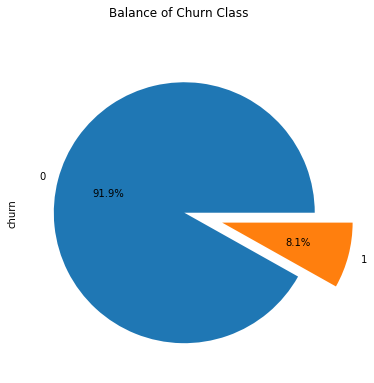

In [47]:
# Checking Balance of Target Class
fig = plt.figure(figsize = (6,6))
plt.suptitle('Balance of Churn Class', fontsize = 12)
cust['churn'].value_counts(normalize = True).plot.pie(autopct='%1.1f%%', explode=[0,0.3])
plt.show()

**Observation:** About 8.1% of high value customers have churned acc to the data.

### 2.5: Outlier Analysis

In [48]:
# Function to plot box
def Box_Plotter (df):
    plt.style.use('seaborn')
    %matplotlib inline
    font1 = 22
    font2 = 18
    font3 = 14
    fig = plt.figure(figsize = (18,4*14))
    #fig.suptitle('Box Plots', fontsize=font1)
    colors = iter(plt.cm.rainbow(np.linspace(0, 1, df.columns[0:].shape[0])))
    for ii in enumerate(df.columns[0:]):
        ax1 = fig.add_subplot(14, 8, ii[0]+1)
        plt.subplot(ax1)
        sns.boxplot(data = df, y=[ii[1]], color=next(colors))
        plt.ylabel(ii[1], fontsize=font3)
    plt.tight_layout()
    plt.show()
    return

In [49]:
# Dtype conversion of count to integer

cols_to_int = [item for item in cust.columns if 'count' in item]
cust[cols_to_int] = cust[cols_to_int].astype('int64')

In [50]:
# List of columns with float values
cols_float = list(cust.columns[cust.dtypes=='float'])

# Box Plot before capping
#Box_Plotter(cust[cols_float])

**Observation:** Need some sort of capping to avoid outliers in float data. Integer data can be left as it is.

In [51]:
# Setup the boundaries
sd_number = 3 # +/- 3 standard deviation

# Capping of float variables
for item in cols_float:
    top_val = cust[item].mean() + sd_number * cust[item].std()
    bot_val = cust[item].mean() - sd_number * cust[item].std()
    cust[item][cust[item] > top_val] = top_val
    cust[item][cust[item] < bot_val] = bot_val

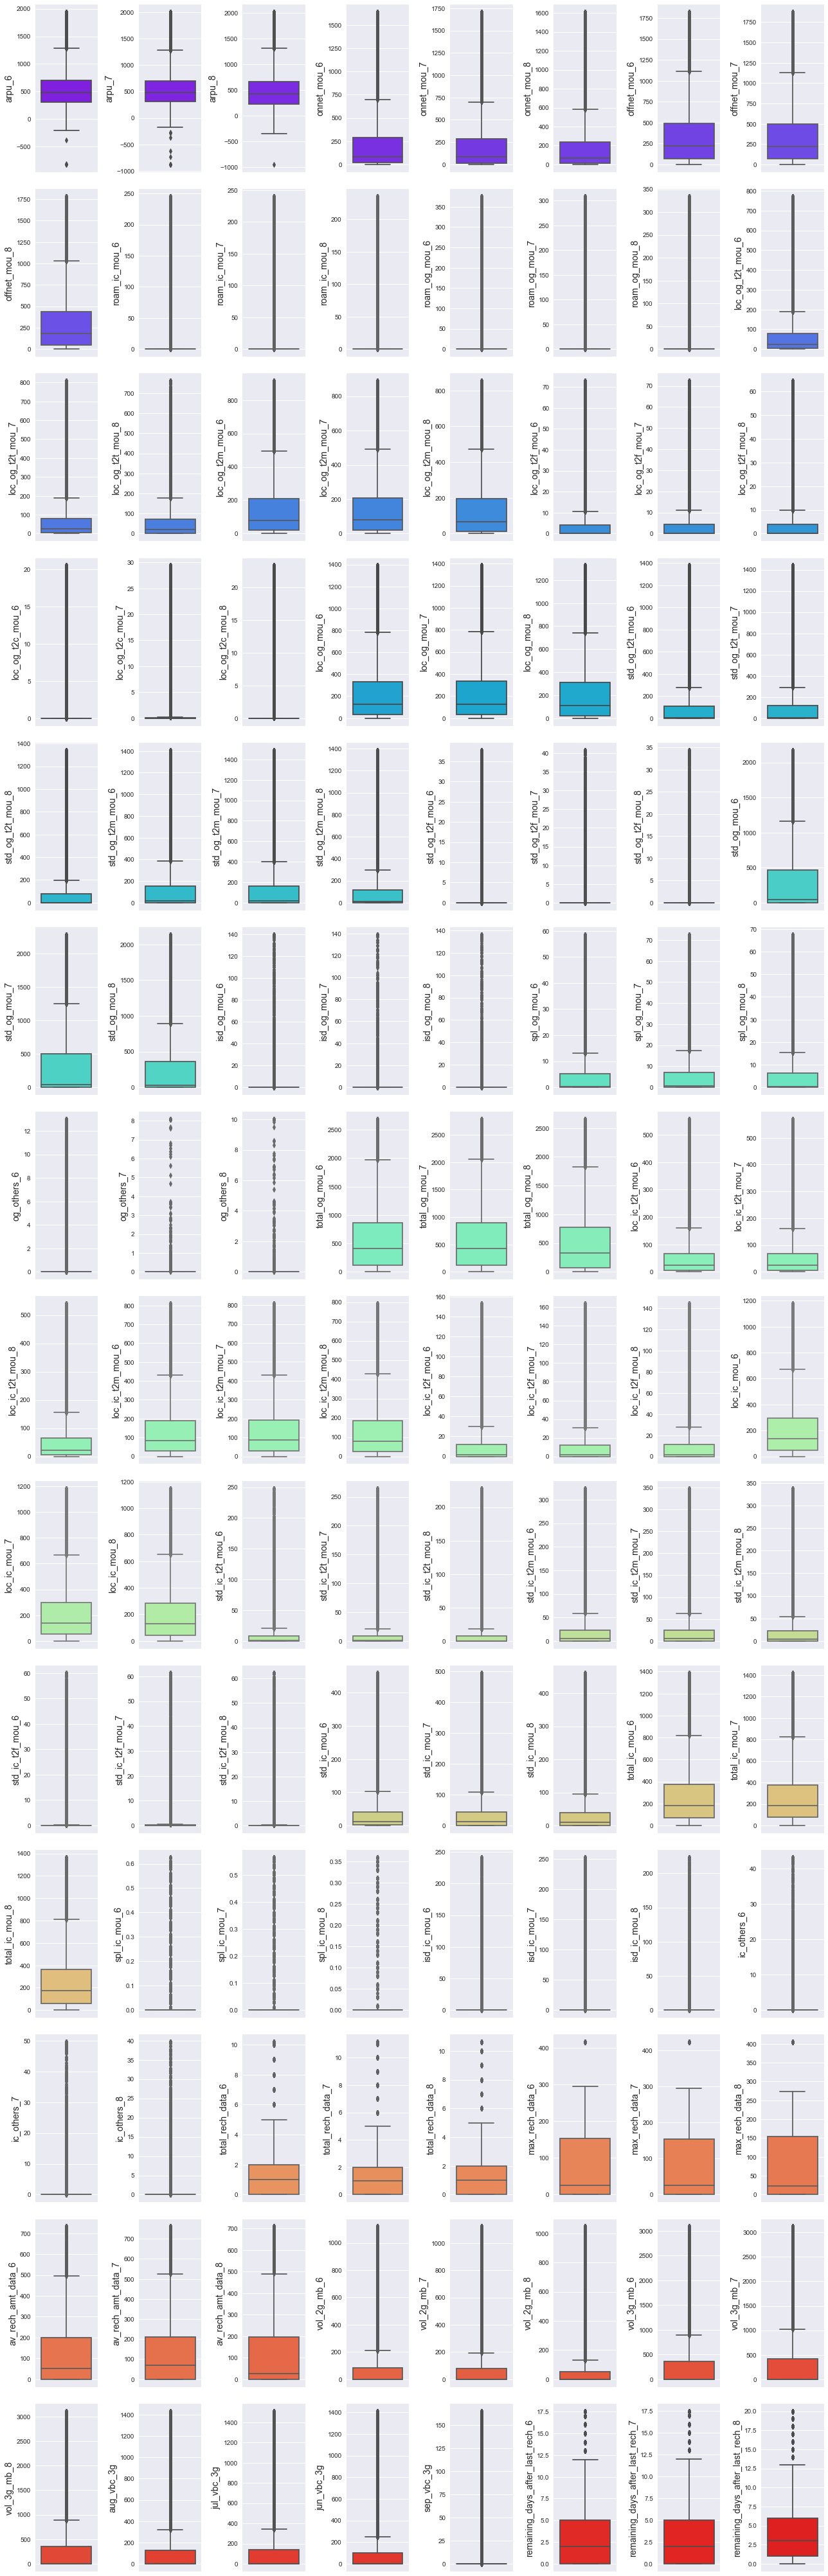

In [52]:
# Box Plot after capping
Box_Plotter(cust[cols_float])

**Observation:** Outlier treatment is an important step before PCA. Data is now ready for EDA.

## 3: EDA and Data Vizualization

### Analysis of recharge related variables

In [53]:
# List of columns with recharge related variables
cols_6 = [item for item in cust.columns if '_6' in item]
cols_7 = [item for item in cust.columns if '_7' in item]
cols_8 = [item for item in cust.columns if '_8' in item]

cols_6_rech = [item for item in cols_6 if '_rech' in item]
cols_7_rech = [item for item in cols_7 if '_rech' in item]
cols_8_rech = [item for item in cols_8 if '_rech' in item]

In [54]:
# Function to plot box
def Box_with_hue (df, var1, var2, var3):
    plt.style.use('seaborn')
    %matplotlib inline
    plt.figure(figsize = (18,7))
    
    plt.subplot(1,3,1)
    sns.boxplot(data = df, x="churn", y=var1, hue='churn', palette="inferno", showfliers=False)
    plt.title(var1, fontsize=18)
    plt.legend(loc='best', fontsize=18)
    plt.xlabel('Churn', fontsize=18)
    
    plt.subplot(1,3,2)
    sns.boxplot(data = df, x="churn", y=var2, hue='churn', palette="inferno", showfliers=False)
    plt.title(var2, fontsize=18)
    plt.legend(loc='best', fontsize=18)
    plt.xlabel('Churn', fontsize=18)
    
    plt.subplot(1,3,3)
    sns.boxplot(data = df, x="churn", y=var3, hue='churn',palette="inferno", showfliers=False)
    plt.title(var3, fontsize=18)
    plt.legend(loc='best', fontsize=18)
    plt.xlabel('Churn', fontsize=18)

    plt.tight_layout()
    plt.show()
    return

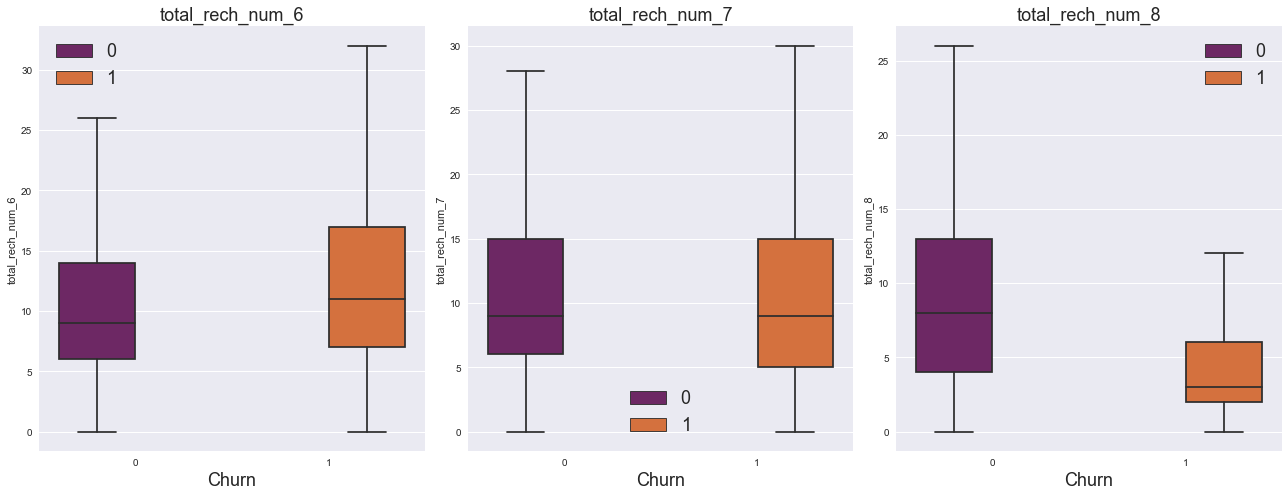

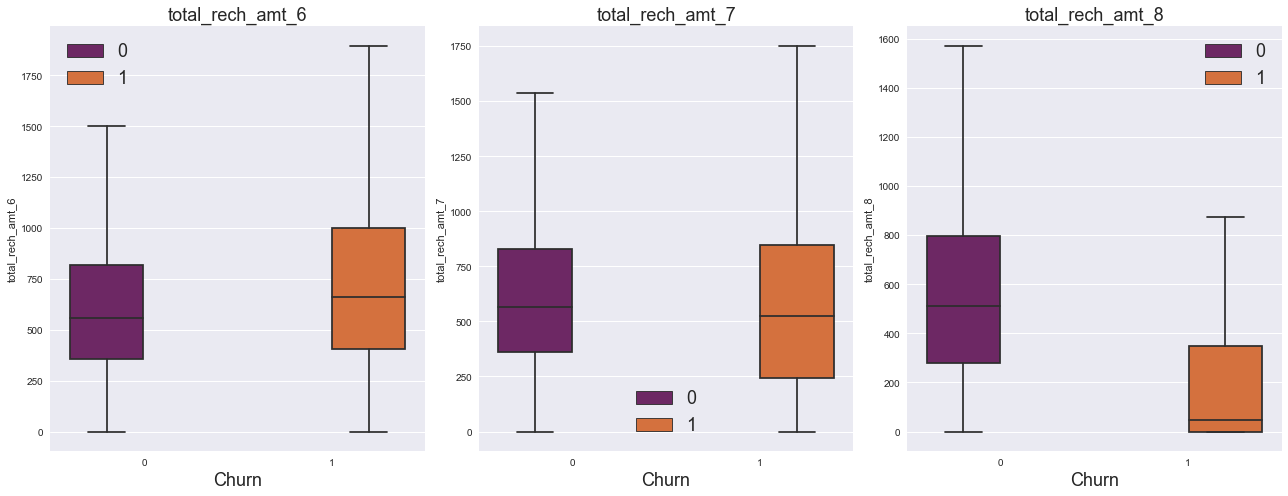

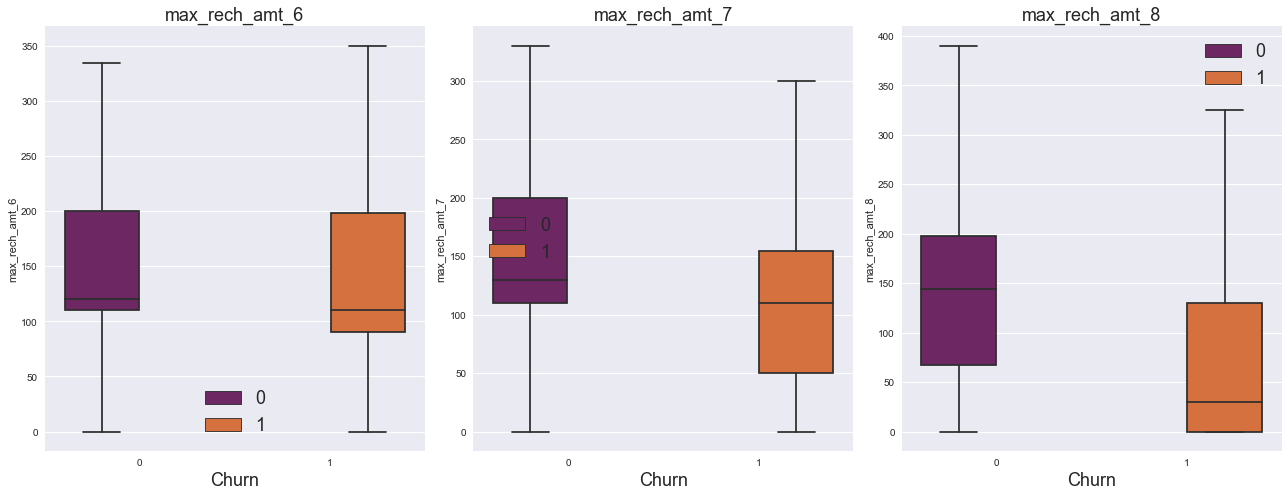

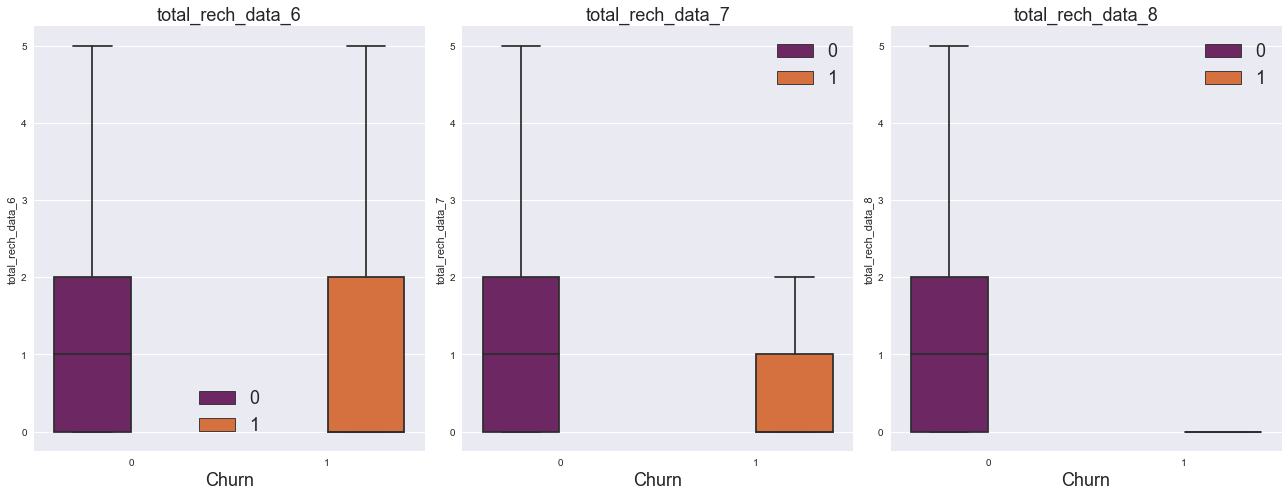

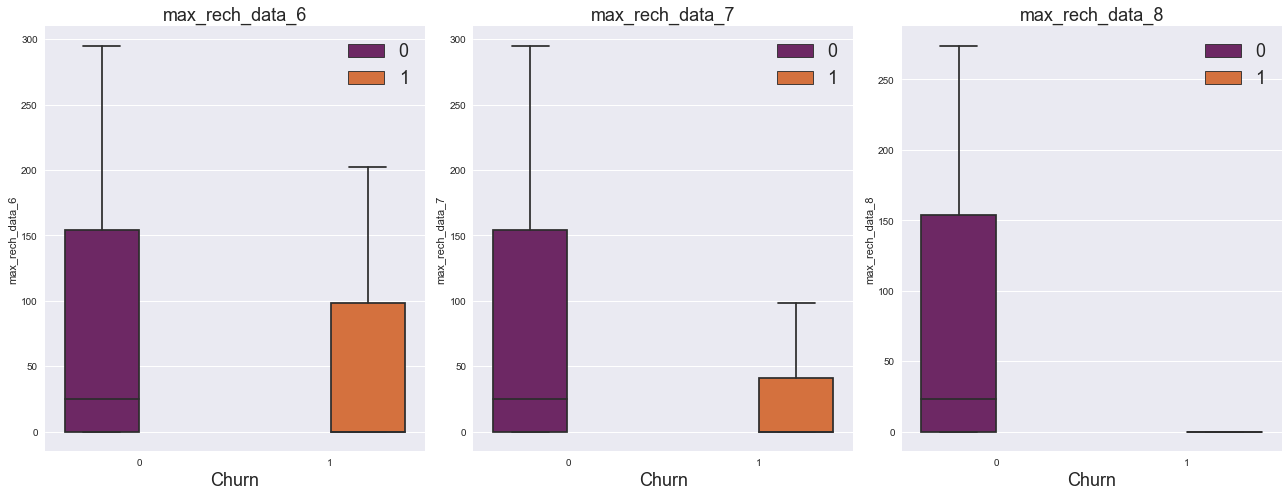

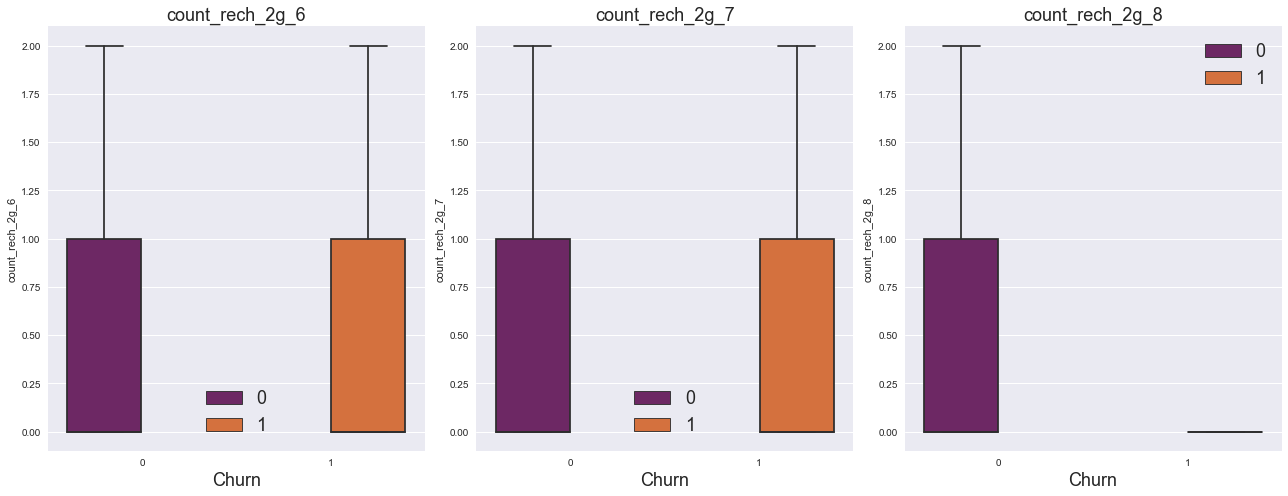

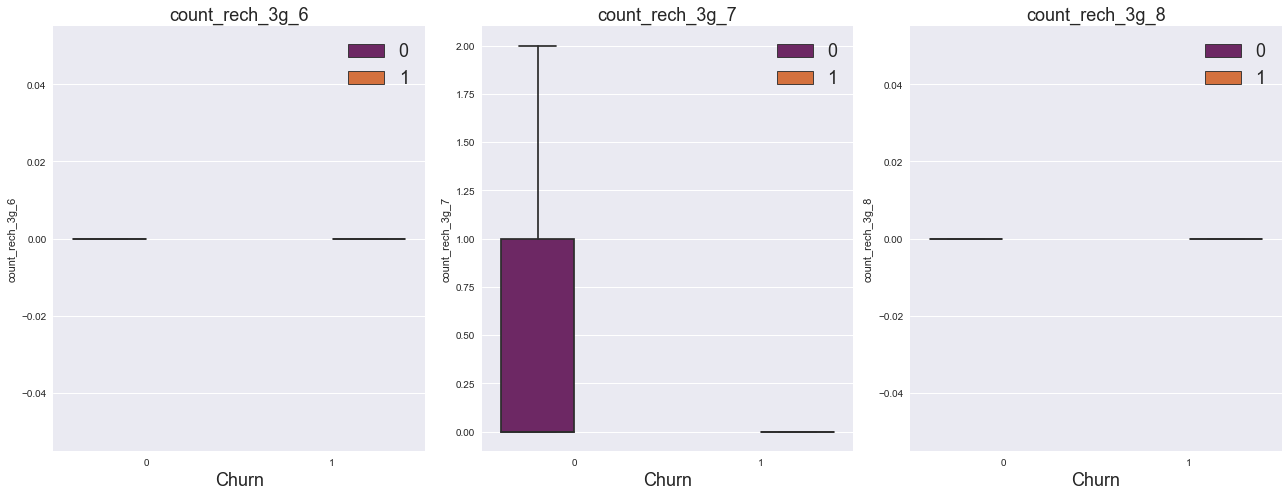

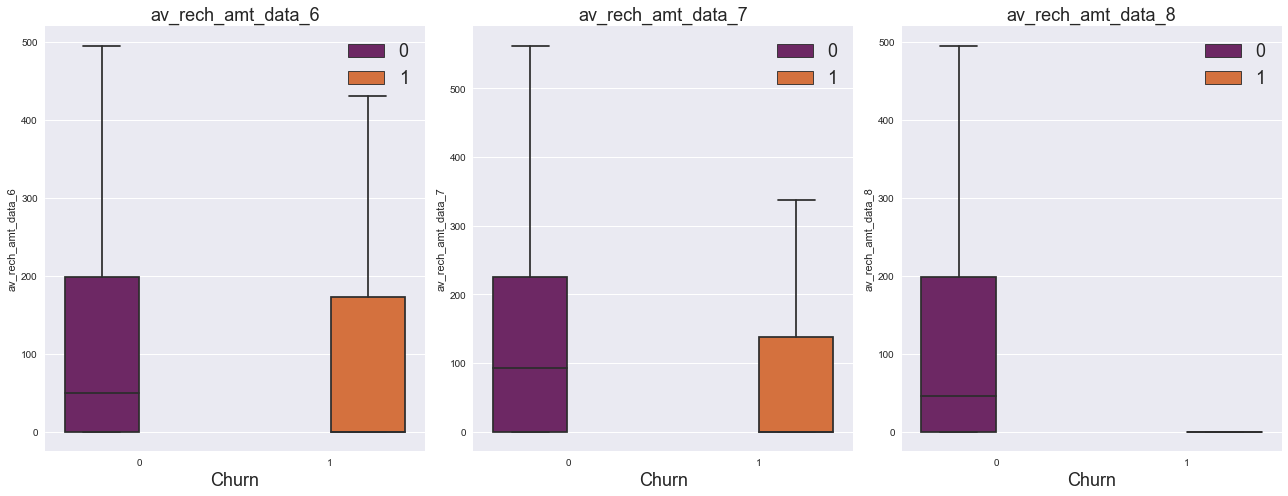

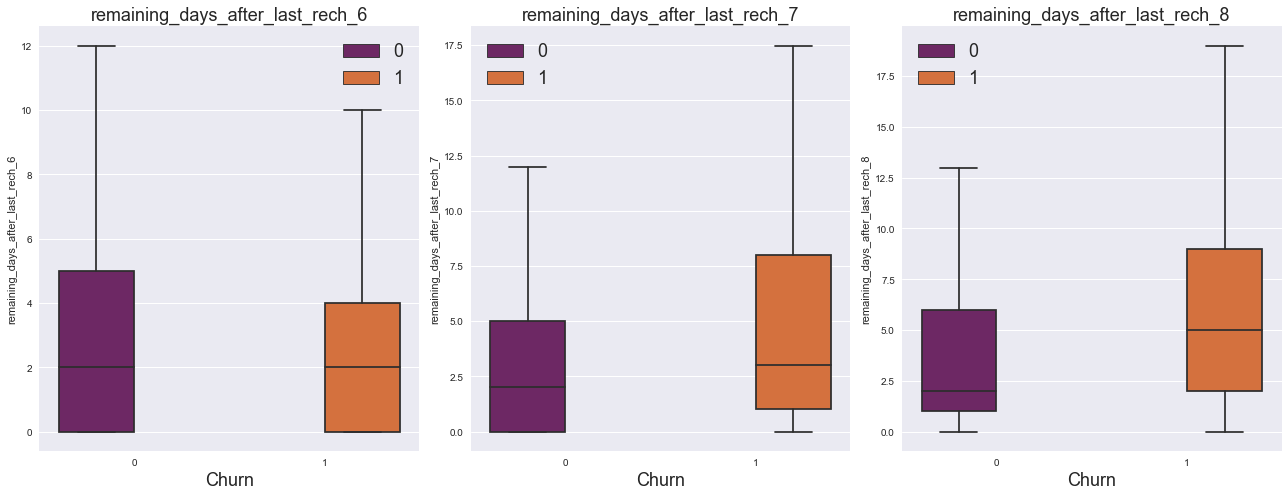

In [55]:
# Bivariate Analysis
for i in range(len(cols_6_rech)):
    Box_with_hue(cust, cols_6_rech[i], cols_7_rech[i], cols_8_rech[i])

##### EDA Observations of Recharge Variables:

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>    

- total_rech_num: Reduced for churn customers in month 8
- total_rech_amt: Also reduced for churn customers in month 8
- max_rech_amt: Lower levels for churn customers in all months 
- total_rech_data: Very low values for churn customers in month 8
- max_rech_data: Very low values for churn customers in month 8
- count_rech_2g: Low values for churn customers in month 7
- count_rech_3g: Low values for churn customers in month 7 and 8
- av_rech_amt_data: Low values for churn customers in month 7 and 8
- remaining_days_after_last_rech: High values for churn customers in month 8

### Analysis of Average revenue per user

In [56]:
# List of columns with arpu related variables
cols_arpu = [item for item in cust.columns if 'arpu' in item]
cols_arpu

['arpu_6', 'arpu_7', 'arpu_8']

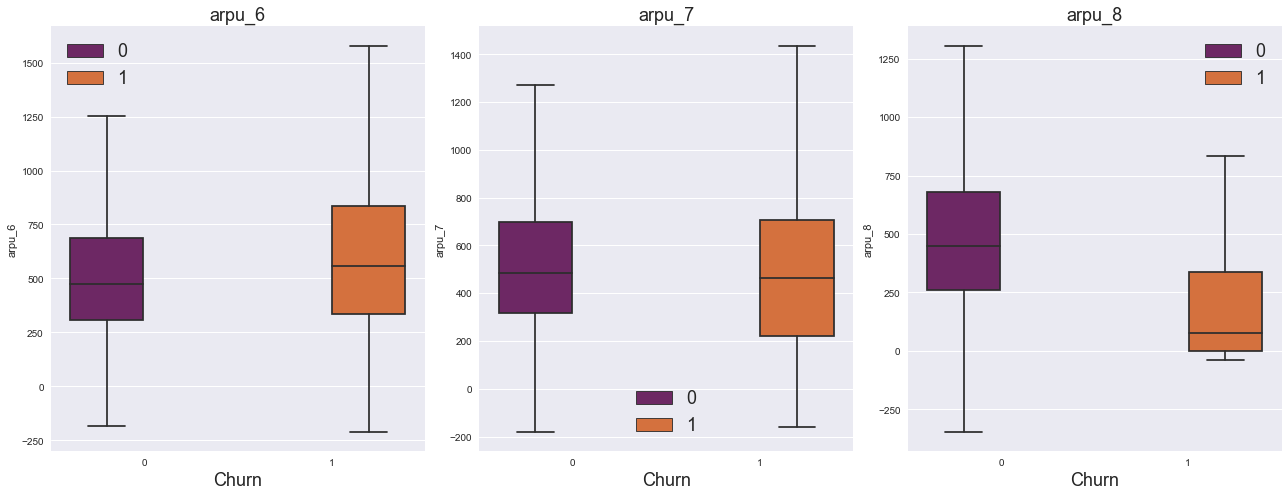

In [57]:
# Box Plot
Box_with_hue(cust, cols_arpu[0], cols_arpu[1], cols_arpu[2])

##### EDA Observations of Average Revenue Per User:

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>    

- arpu: Huge reduction in ARPU during month-8. Infact starts reducing from month 7 onwards.

### Analysis of 2G related data

In [58]:
# List of columns with 2g related variables
cols_6_2g = [item for item in cols_6 if '2g' in item]
cols_7_2g = [item for item in cols_7 if '2g' in item]
cols_8_2g = [item for item in cols_8 if '2g' in item]

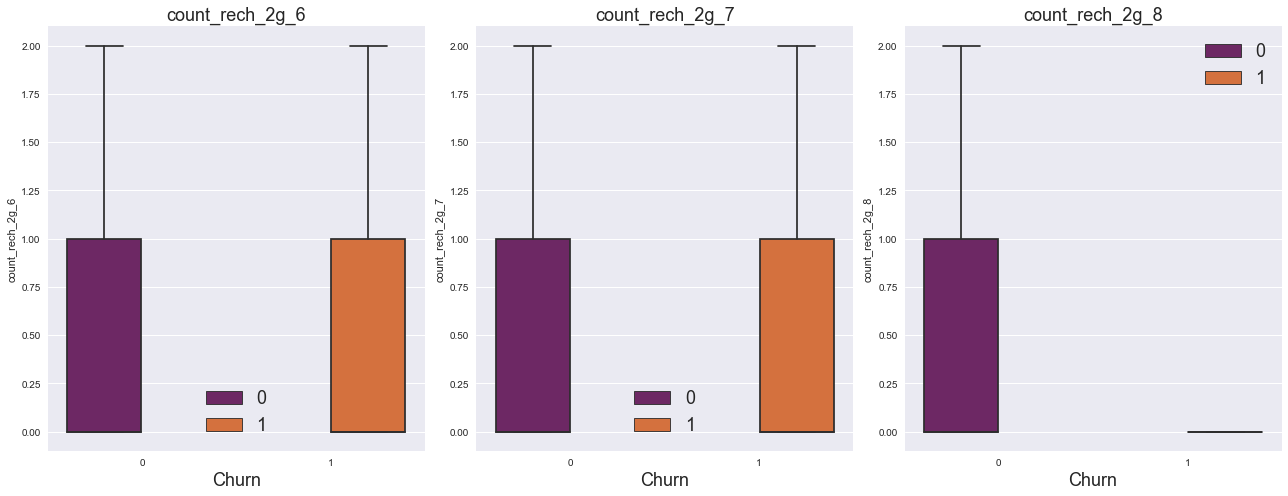

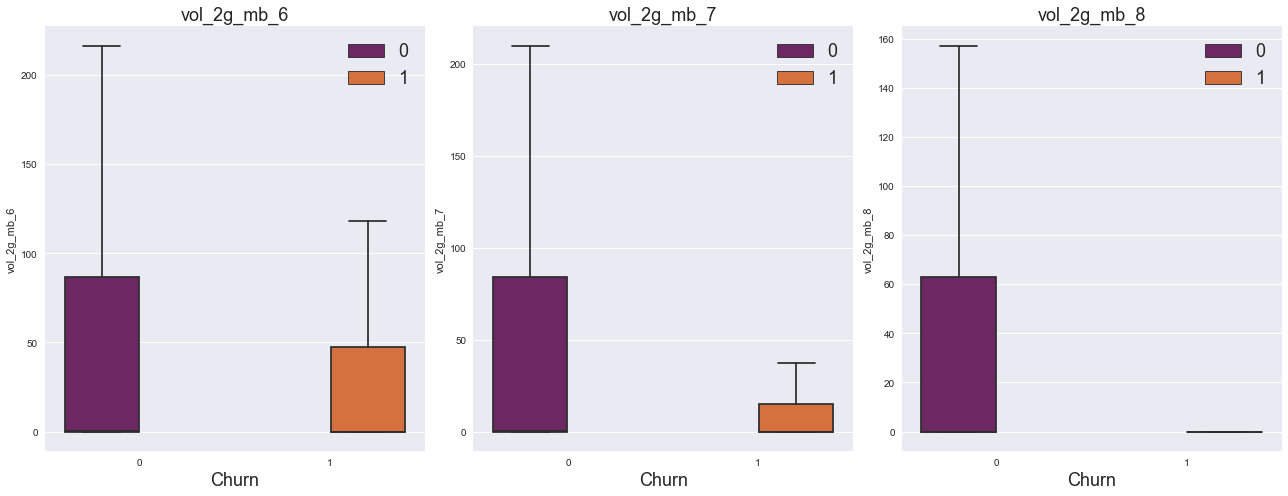

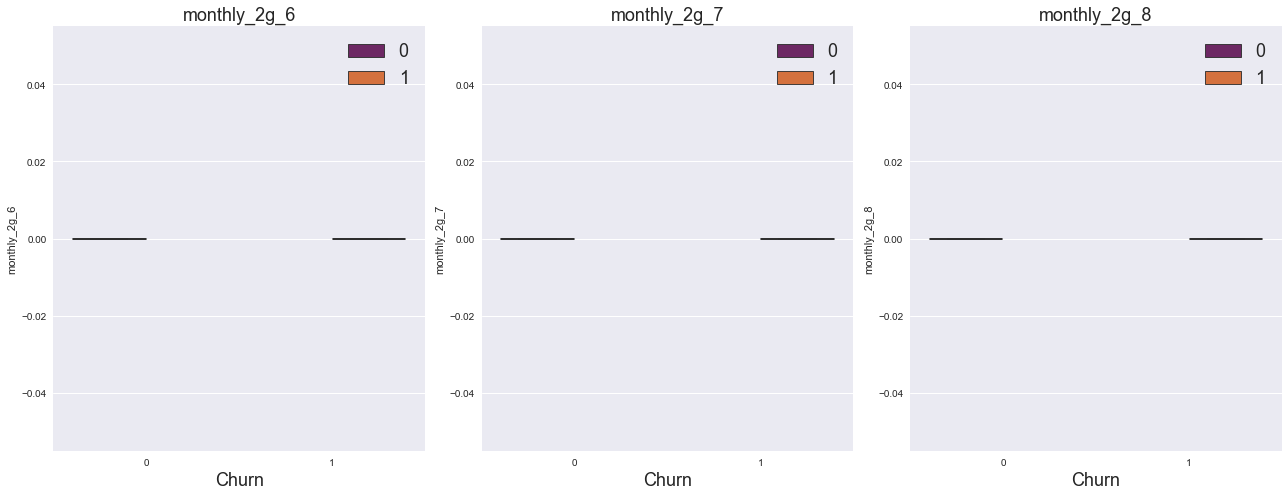

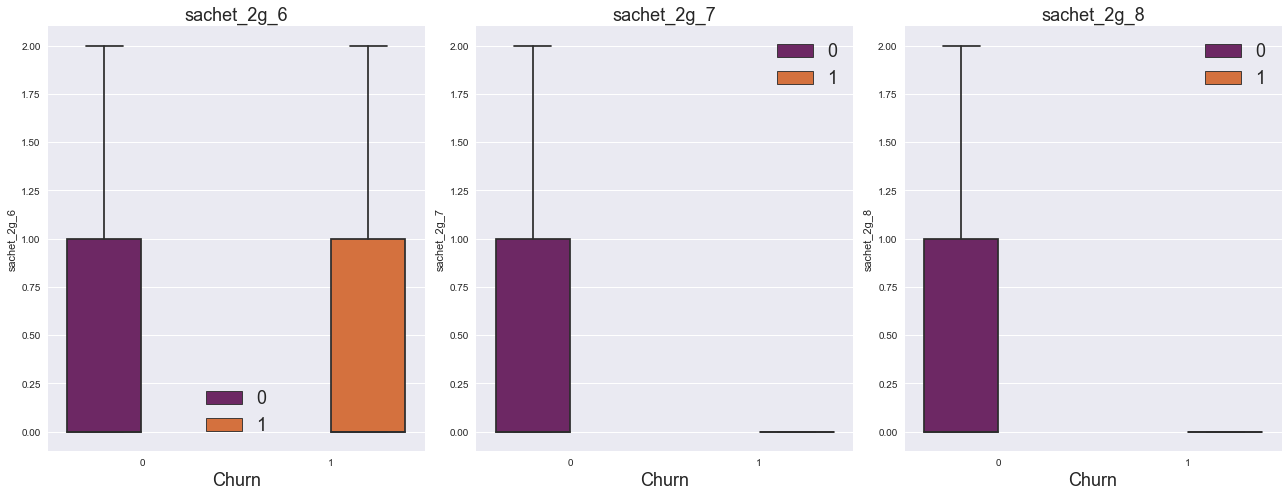

In [59]:
# Bivariate Analysis
for i in range(len(cols_6_2g)):
    Box_with_hue(cust, cols_6_2g[i], cols_7_2g[i], cols_8_2g[i])

##### EDA Observations of 2G Variables:

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>    

- vol_2g_mb: Keeps reducing for churn customers from month-6 to month-8
- monthly_2g: Small change.
- sachet_2g: Reduced for churn customers in month 7 and 8

In [60]:
# Mean values of monthly_2g variables
cols_monthly_2g = [item for item in cust.columns if 'monthly_2g' in item]

for item in cols_monthly_2g:
    print ('Mean Value of ', item, '= ', np.mean(cust[item]))

Mean Value of  monthly_2g_6 =  0.17449418352721577
Mean Value of  monthly_2g_7 =  0.18326055798140062
Mean Value of  monthly_2g_8 =  0.15362821239292024


### Analysis of 3G related data

In [61]:
# List of columns with 2g related variables
cols_6_3g = [item for item in cols_6 if '3g' in item]
cols_7_3g = [item for item in cols_7 if '3g' in item]
cols_8_3g = [item for item in cols_8 if '3g' in item]

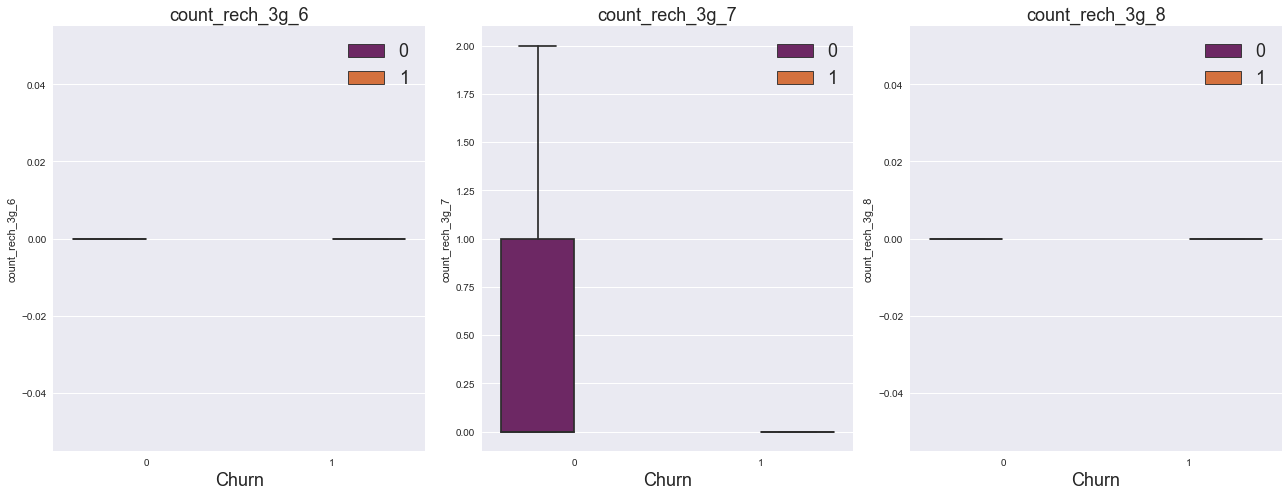

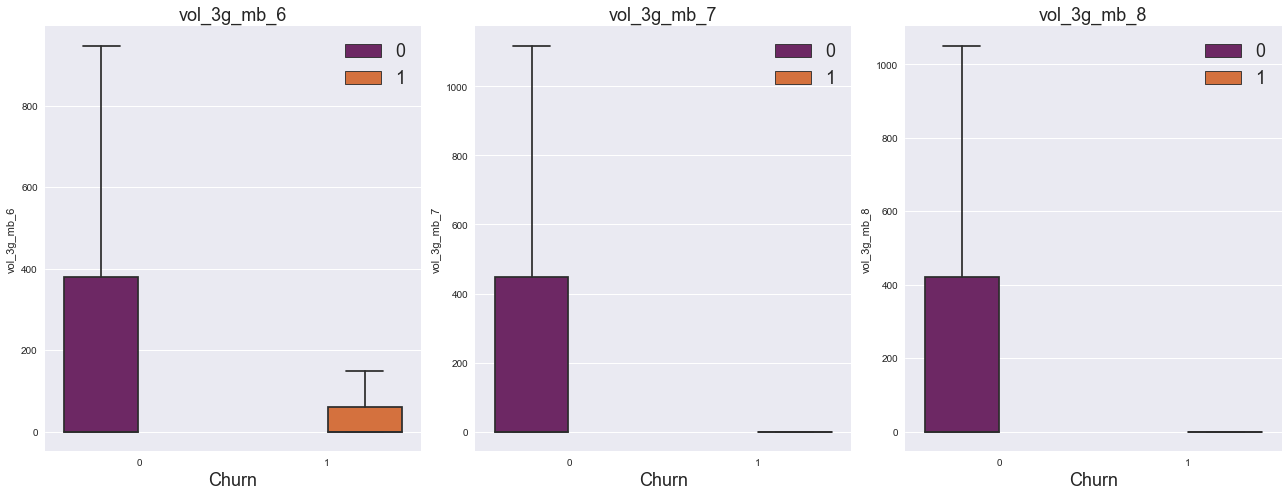

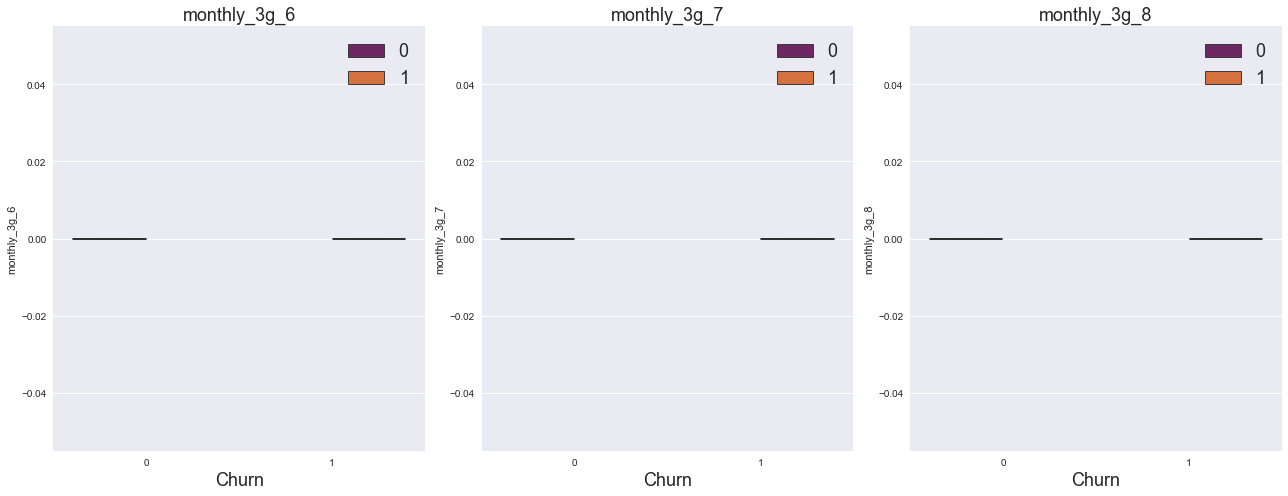

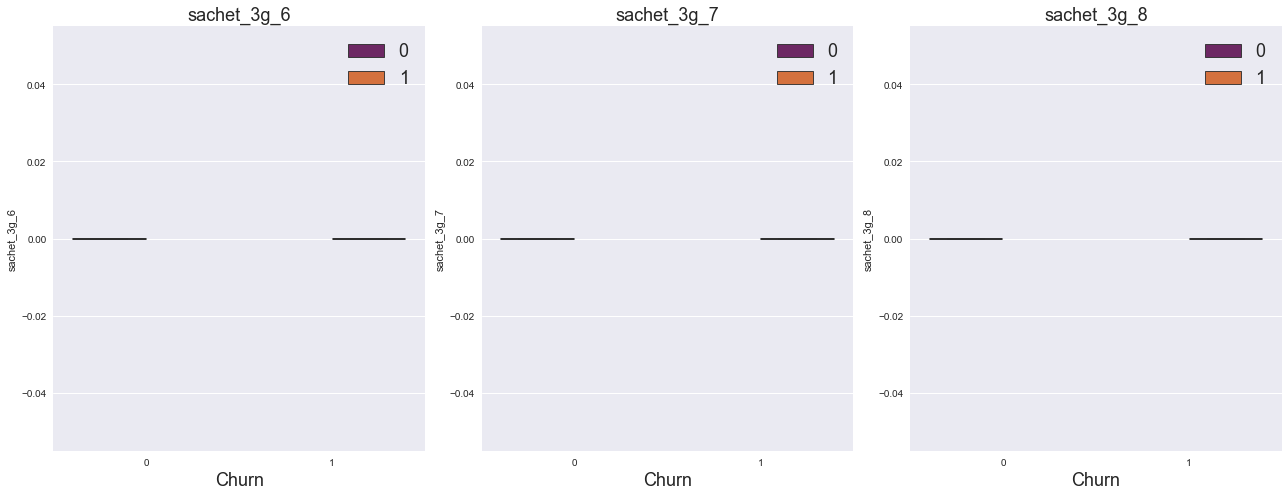

In [62]:
# Bivariate Analysis
for i in range(len(cols_6_3g)):
    Box_with_hue(cust, cols_6_3g[i], cols_7_3g[i], cols_8_3g[i])

##### EDA Observations of 3G Variables:

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>    

- vol_3g_mb: Keeps reducing for churn customers from month-6 to month-8
- monthly_3g: Small change.
- sachet_3g: Small change.

In [63]:
# MEan monthly_3g variables
cols_monthly_3g = [item for item in cust.columns if 'monthly_3g' in item]

for item in cols_monthly_3g:
    print ('Mean Value of ', item, '= ', np.mean(cust[item]))

Mean Value of  monthly_3g_6 =  0.21775940801973268
Mean Value of  monthly_3g_7 =  0.22902569914336188
Mean Value of  monthly_3g_8 =  0.21102629912336254


In [64]:
# MEan sachet_3g variables
cols_sachet_3g = [item for item in cust.columns if 'sachet_3g' in item]

for item in cols_sachet_3g:
    print ('Mean Value of ', item, '= ', np.mean(cust[item]))

Mean Value of  sachet_3g_6 =  0.2093930202326589
Mean Value of  sachet_3g_7 =  0.22749241691943603
Mean Value of  sachet_3g_8 =  0.20239325355821472


### Analysis of Volume based cost

In [65]:
# List of columns with vbc related variables
cols_vbc = [item for item in cust.columns if 'vbc' in item]
cols_vbc

['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g']

Seems like we will have to rename the columns !

In [66]:
# Rename
cust.rename(columns={'jun_vbc_3g':'vbc_3g_6',
                     'jul_vbc_3g':'vbc_3g_7',
                     'aug_vbc_3g':'vbc_3g_8'}, inplace=True)

# Drop september
print ('Shape before dropping: ', cust.shape)
cust.drop(columns = ['sep_vbc_3g'], inplace=True)
print ('Shape after dropping: ', cust.shape)

Shape before dropping:  (30001, 146)
Shape after dropping:  (30001, 145)


In [67]:
# List of columns with vbc related variables
cols_vbc = [item for item in cust.columns if 'vbc' in item]
cols_vbc

['vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6']

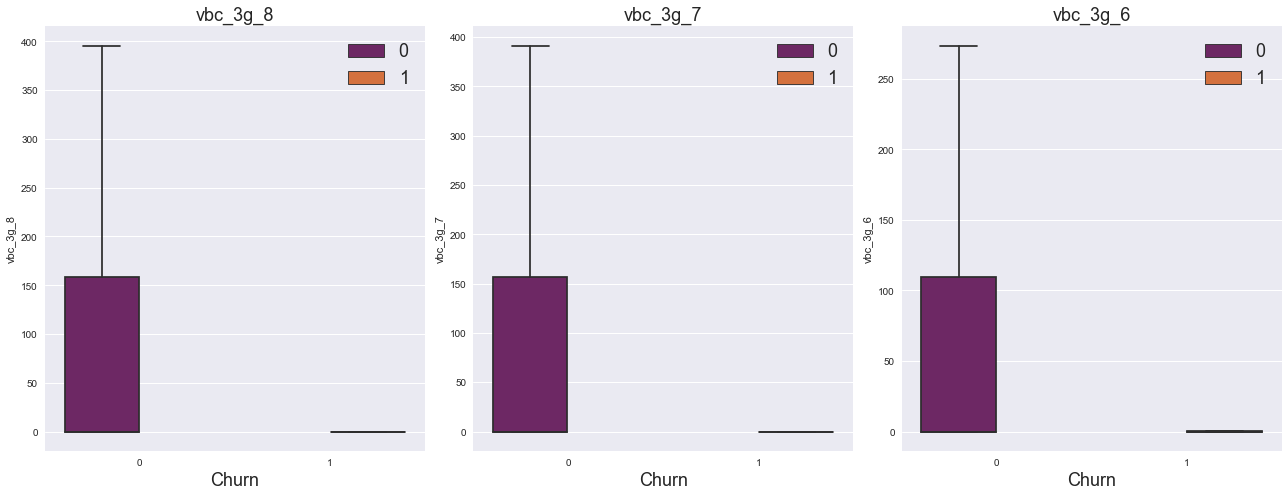

In [68]:
# Box Plot
Box_with_hue(cust, cols_vbc[0], cols_vbc[1], cols_vbc[2])

##### EDA Observations of Volume Based Cost:

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>    

- vbc: Huge reduction in vbc in all the months. This can be a early detector.

### Analysis of Variables - Others

In [69]:
# List of columns with others related variables
cols_og_oth = [item for item in cust.columns if 'og_others' in item]
cols_og_oth

['og_others_6', 'og_others_7', 'og_others_8']

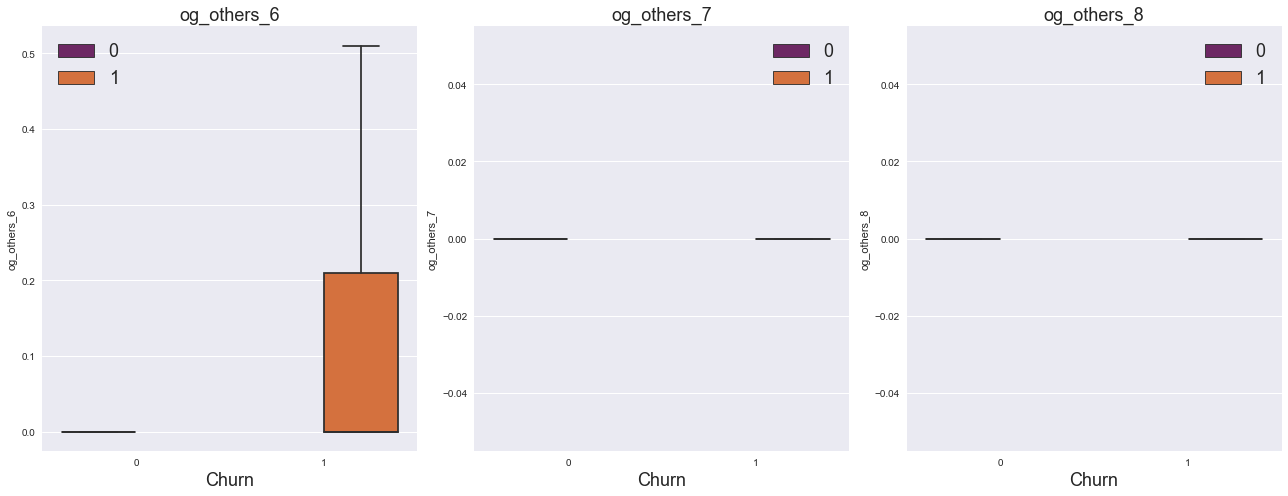

In [70]:
# Box Plot
Box_with_hue(cust, cols_og_oth[0], cols_og_oth[1], cols_og_oth[2])

In [71]:
# MEan og_others variables

for item in cols_og_oth:
    print ('Mean Value of ', item, '= ', np.mean(cust[item]))

Mean Value of  og_others_6 =  0.6076321305182302
Mean Value of  og_others_7 =  0.012704319671849776
Mean Value of  og_others_8 =  0.016198583476734564


In [72]:
# List of columns with others related variables
cols_ic_oth = [item for item in cust.columns if 'ic_others' in item]
cols_ic_oth

['ic_others_6', 'ic_others_7', 'ic_others_8']

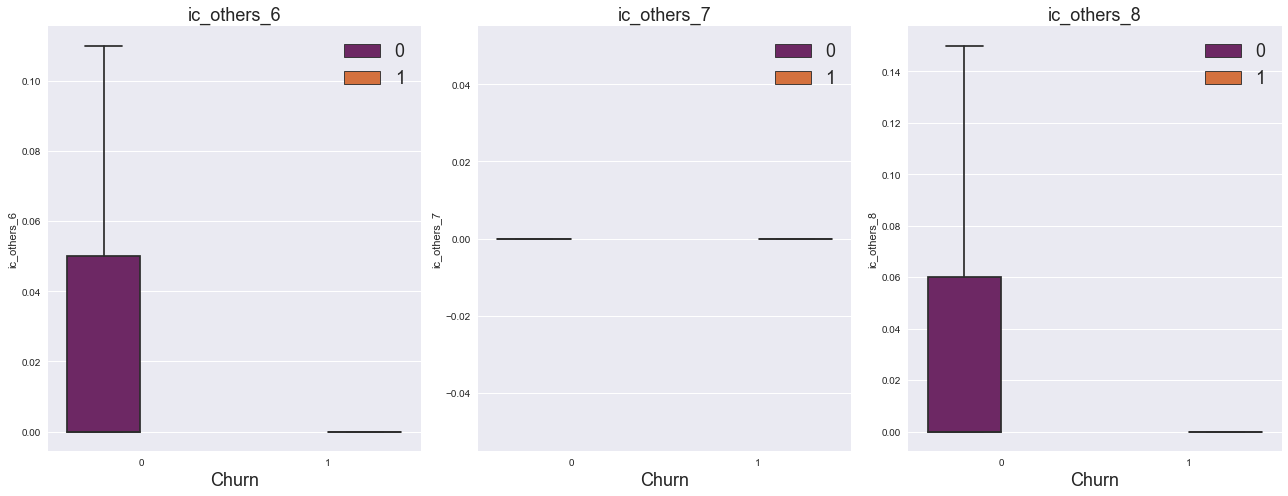

In [73]:
# Box Plot
Box_with_hue(cust, cols_ic_oth[0], cols_ic_oth[1], cols_ic_oth[2])

In [74]:
# MEan og_others variables

for item in cols_ic_oth:
    print ('Mean Value of ', item, '= ', np.mean(cust[item]))

Mean Value of  ic_others_6 =  0.8196339365216637
Mean Value of  ic_others_7 =  1.032469882664985
Mean Value of  ic_others_8 =  0.8550093395224805


##### EDA Observations of Others variables:

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>    

- og_others: Huge reduction from month 6 to 7 amongst churn customers.

### Analysis of last_day recharge amount

In [75]:
# List of columns with last_day related variables
cols_lday = [item for item in cust.columns if 'last_day' in item]
cols_lday

['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8']

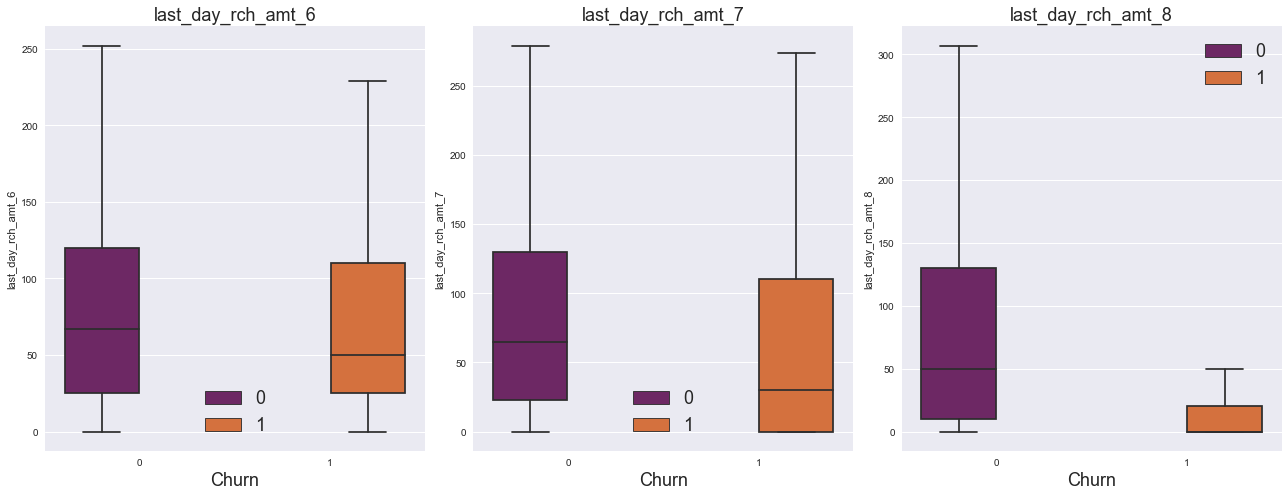

In [76]:
# Box Plot
Box_with_hue(cust, cols_lday[0], cols_lday[1], cols_lday[2])

##### EDA Observations of last day recharge amount:

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>    

- last_day_rch_amt: Reduction from month 6 to 7 and 8 amongst churn customers.

### Analysis of Age on network 

In [77]:
# List of columns with aon related variables
cols_aon = [item for item in cust.columns if 'aon' in item]
cols_aon

['aon']

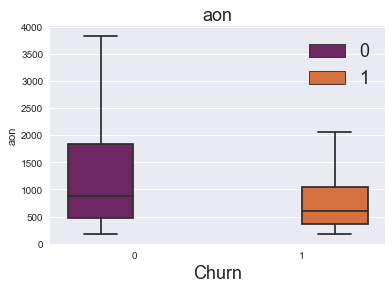

In [78]:
### Box Plot
sns.boxplot(data = cust, x="churn", y='aon', hue='churn', palette="inferno", showfliers=False)
plt.title('aon', fontsize=18)
plt.legend(loc='best', fontsize=18)
plt.xlabel('Churn', fontsize=18)
plt.show()

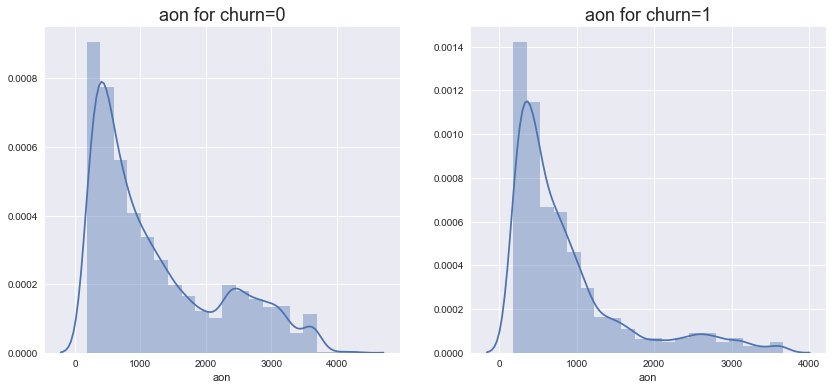

In [79]:
### Dist Plot
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(cust['aon'][cust.churn==0], bins=20)
plt.title('aon for churn=0', fontsize=18)
plt.subplot(1,2,2)
sns.distplot(cust['aon'][cust.churn==1], bins=20)
plt.title('aon for churn=1', fontsize=18)
plt.show()

##### EDA Observations of  Age on Network:

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>    

- aon: Lower for the churn customers.

### Analysis of Minutes of Usage

In [80]:
# Columns with mou
cols_6_mou = [item for item in cols_6 if 'mou' in item]
cols_7_mou = [item for item in cols_7 if 'mou' in item]
cols_8_mou = [item for item in cols_8 if 'mou' in item]
len(cols_6_mou)

27

Since it is lot of float columns, it is better to visualize with heatmap

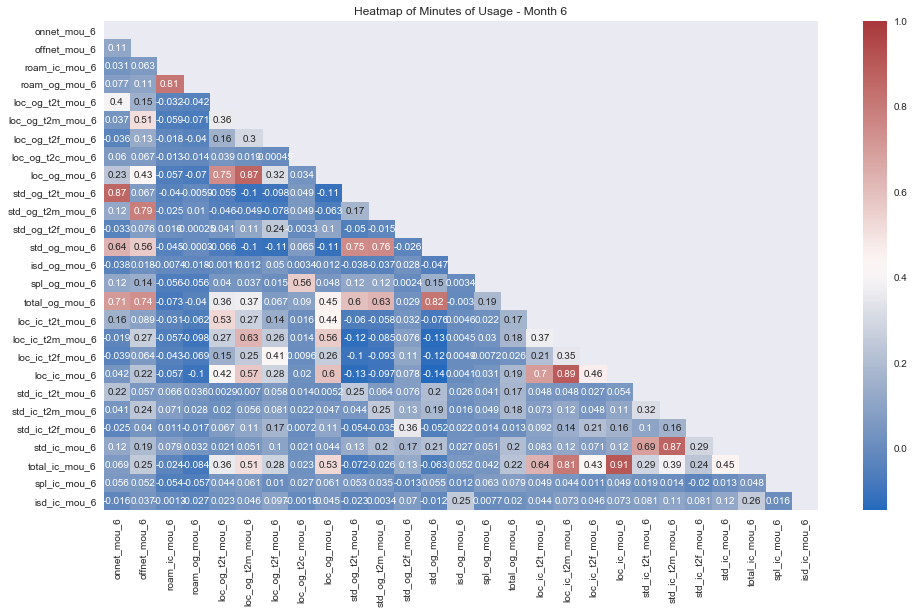

In [81]:
# Heatmap of cols_6_mou

plt.figure(figsize = (16,9))
mask1 = np.zeros_like(cust[cols_6_mou].corr()) # Makes a NP array of 0 with size like the matrix supplied with
mask1[np.triu_indices_from(mask1)] = True # Makes the segment below the diagonal as 0 and rest as 1
sns.heatmap(cust[cols_6_mou].corr(), mask= mask1, annot=True, cmap= 'vlag')
plt.title('Heatmap of Minutes of Usage - Month 6')
plt.show()

##### EDA Observations of  Minutes of Usage:

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>    

- Lot of variables. Few can be dropped. However PCA will take care of dimensionality reduction, therfore decided to proceed.

## 4: Goal-1: Churn Prediction

### 4.1: Derived Features

**Observation:** Acc to the problem statement, the first two months are the ‘good’ phase, the third month is the ‘action’ phase.

**Derived Features:**
1. remaining_days_after_last_rech (already derived)
2. Combine 2g and 3g by adding them up and looking at net internet footprint on the network.
3. Mean of relevant columns during the good phase i.e. 6 & 7. So we will have 2 variables. One for good phase and another for action phase. Then we can drop 6 and 7.

In [82]:
# Shape before Derived Features Creation
shape_before = cust.shape

## Derived Feature - 2 - Combine 2g and 3g

In [83]:
# Create updated list of column names for months 6, 7 and 8

cols_6 = [item for item in cust.columns if '_6' in item]
cols_7 = [item for item in cust.columns if '_7' in item]
cols_8 = [item for item in cust.columns if '_8' in item]

# Create updated list of column names for 2g and 3g

cols_6_2g = [item for item in cols_6 if '2g' in item]
cols_7_2g = [item for item in cols_7 if '2g' in item]
cols_8_2g = [item for item in cols_8 if '2g' in item]

cols_6_3g = [item for item in cols_6 if '3g' in item]
cols_7_3g = [item for item in cols_7 if '3g' in item]
cols_8_3g = [item for item in cols_8 if '3g' in item]

print (cols_6_2g)
print (cols_6_3g)

print (cols_7_2g)
print (cols_7_3g)

print (cols_8_2g)
print (cols_8_3g)

['count_rech_2g_6', 'vol_2g_mb_6', 'monthly_2g_6', 'sachet_2g_6']
['count_rech_3g_6', 'vol_3g_mb_6', 'monthly_3g_6', 'sachet_3g_6', 'vbc_3g_6']
['count_rech_2g_7', 'vol_2g_mb_7', 'monthly_2g_7', 'sachet_2g_7']
['count_rech_3g_7', 'vol_3g_mb_7', 'monthly_3g_7', 'sachet_3g_7', 'vbc_3g_7']
['count_rech_2g_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8']
['count_rech_3g_8', 'vol_3g_mb_8', 'monthly_3g_8', 'sachet_3g_8', 'vbc_3g_8']


In [84]:
# Column Name Dictionary
dict_name = {0: 'count_rech_2g_and_3g',
            1: 'vol_2g_and_3g_mb',
            2: 'monthly_2g_and_3g',
            3: 'sachet_2g_and_3g'}

# Combine 2g and 3g by adding them up for 6, 7 and 8 seperately
for i in range(0,4):
    cust[dict_name[i] + '_6'] = cust[cols_6_2g[i]] + cust[cols_6_3g[i]]
    cust[dict_name[i] + '_7'] = cust[cols_7_2g[i]] + cust[cols_7_3g[i]]
    cust[dict_name[i] + '_8'] = cust[cols_8_2g[i]] + cust[cols_8_3g[i]]

# Dropping list of columns with 2g and 3g
print ('Shape before dropping: ', cust.shape)
cols_drop = cols_6_2g[:4] + cols_7_2g[:4] + cols_8_2g[:4] + cols_6_3g[:4] + cols_7_3g[:4] + cols_8_3g[:4]
cust.drop(columns=cols_drop, inplace=True)
print ('Shape after dropping: ', cust.shape)

Shape before dropping:  (30001, 157)
Shape after dropping:  (30001, 133)


## Derived Feature - 3 - Average of _6 and _7 i.e. good phase

In [85]:
# Create updated list of column names for months 6, 7

cols_6 = [item for item in cust.columns if '_6' in item]
cols_7 = [item for item in cust.columns if '_7' in item]
print (len(cols_6), len(cols_7))

43 43


In [86]:
# Check if names are NOT in same order

tag= 'Same'
for i in range(len(cols_6)):
    str6,str7 = cols_6[i],cols_7[i]
    if (str6.rstrip('_6') != str7.rstrip('_7')):
        tag = 'Not Same'

print ('String names are ', tag)

String names are  Same


In [87]:
# Average of 6 and 7 - good phase months
for i in range(len(cols_6)):
    str6 = cols_6[i].rstrip('_6')
    if cust[cols_6[i]].dtypes=='float':
        cust[str6 + '_avg_67'] = (cust[cols_6[i]] + cust[cols_7[i]])/2 # Takes avg
    else:
        cust[str6 + '_avg_67'] = (cust[cols_6[i]] + cust[cols_7[i]])/2 # Takes avg
        cust[str6 + '_avg_67'] = cust[str6 + '_avg_67'].astype('int32') # Converts to int avg

In [88]:
# Dropping list of columns with _6 and _7 since we now have a derived column _67
print ('Shape before dropping: ', cust.shape)
cols_drop = cols_6 + cols_7
cust.drop(columns=cols_drop, inplace=True)
print ('Shape after dropping: ', cust.shape)

Shape before dropping:  (30001, 176)
Shape after dropping:  (30001, 90)


In [89]:
# Summary
print ('Shape before Derived Feature Creation: ', shape_before)
print ('Shape after Derived Feature Creation: ', cust.shape)

Shape before Derived Feature Creation:  (30001, 145)
Shape after Derived Feature Creation:  (30001, 90)


**Observation:** We have dropped about 55 columns after derived features creation.

### 4.2: Train Test Split

In [90]:
# X and y dataframes

X_cols = list(cust.columns)
X_cols.remove('mobile_number')
X_cols.remove('circle_id')
X_cols.remove('churn')

X_df = cust[X_cols].copy(deep=True)
y_df = cust[['churn']].copy(deep=True)

print ('Shape of X: ', X_df.shape)
print ('Shape of y: ', y_df.shape)

Shape of X:  (30001, 87)
Shape of y:  (30001, 1)


In [91]:
# Train Test Split 70 - 30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.3, random_state = 42)

print ('Shape of X_train, y_train: ', X_train.shape, y_train.shape)
print ('Shape of X_test, y_test: ', X_test.shape, y_test.shape)

Shape of X_train, y_train:  (21000, 87) (21000, 1)
Shape of X_test, y_test:  (9001, 87) (9001, 1)


In [92]:
# Print head
X_train.head(3)

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,aon,vbc_3g_8,remaining_days_after_last_rech_8,count_rech_2g_and_3g_8,vol_2g_and_3g_mb_8,monthly_2g_and_3g_8,sachet_2g_and_3g_8,arpu_avg_67,onnet_mou_avg_67,offnet_mou_avg_67,roam_ic_mou_avg_67,roam_og_mou_avg_67,loc_og_t2t_mou_avg_67,loc_og_t2m_mou_avg_67,loc_og_t2f_mou_avg_67,loc_og_t2c_mou_avg_67,loc_og_mou_avg_67,std_og_t2t_mou_avg_67,std_og_t2m_mou_avg_67,std_og_t2f_mou_avg_67,std_og_mou_avg_67,isd_og_mou_avg_67,spl_og_mou_avg_67,og_others_avg_67,total_og_mou_avg_67,loc_ic_t2t_mou_avg_67,loc_ic_t2m_mou_avg_67,loc_ic_t2f_mou_avg_67,loc_ic_mou_avg_67,std_ic_t2t_mou_avg_67,std_ic_t2m_mou_avg_67,std_ic_t2f_mou_avg_67,std_ic_mou_avg_67,total_ic_mou_avg_67,spl_ic_mou_avg_67,isd_ic_mou_avg_67,ic_others_avg_67,total_rech_num_avg_67,total_rech_amt_avg_67,max_rech_amt_avg_67,last_day_rch_amt_avg_67,total_rech_data_avg_67,max_rech_data_avg_67,av_rech_amt_data_avg_67,vbc_3g_avg_67,remaining_days_after_last_rech_avg_67,count_rech_2g_and_3g_avg_67,vol_2g_and_3g_mb_avg_67,monthly_2g_and_3g_avg_67,sachet_2g_and_3g_avg_67
65002,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,2,0,0,0,0.0,0.0,0.0,1063,0.0,2.0,0,0.0,0,0,590.708,57.56,13.075,0.00,0.00,50.285,10.790,1.390,0.0,62.475,7.270,0.890,0.00,8.160,0.0,0.000,0.0,70.64,25.81,24.980,3.345,54.145,7.885,1.59,9.865,19.345,73.490,0.000,0.000,0.00,5,527,327,100,1.5,419.467754,581.0,817.035,10.0,1,2174.515,1,0
67088,416.021,191.59,267.59,76.53,191.29,35.93,76.54,0.00,0.00,112.48,62.24,93.16,0.0,155.41,0.0,0.00,0.0,267.89,23.79,163.41,0.85,188.06,13.74,3.30,0.00,17.04,206.11,0.0,0.00,1.0,15,464,128,20,0.0,0.0,0.0,459,0.0,0.0,0,0.0,0,0,488.614,185.00,763.075,28.14,88.37,51.125,86.205,0.000,0.0,137.335,124.520,597.845,0.00,722.370,0.0,0.000,0.0,859.71,37.85,137.855,0.175,175.885,0.000,43.81,0.000,43.810,220.345,0.155,0.000,0.48,11,592,120,87,0.0,0.000000,0.0,0.000,1.5,0,0.000,0,0
36410,280.326,109.69,175.46,0.00,0.00,109.69,132.44,27.31,0.46,269.46,0.00,14.28,0.0,14.28,0.0,1.41,0.0,285.16,23.14,51.21,2.11,76.48,3.04,8.46,0.43,11.94,98.23,0.0,9.79,0.0,11,290,130,0,6.0,23.0,138.0,3219,0.0,1.0,6,0.0,0,6,328.199,115.36,187.035,0.00,0.00,105.780,145.095,20.065,0.0,270.950,9.575,19.230,0.67,29.485,0.0,1.955,0.0,302.40,22.40,41.200,2.635,66.250,3.415,5.57,0.380,9.370,99.525,0.000,23.895,0.00,11,413,120,98,3.0,23.000000,69.0,0.000,1.0,3,0.000,0,3


**Observation:** With these 87 features and 1 target variable, let us get to the stage of PCA and modelling for churn classificiation.

### 4.3: PCA for Dimensionality Reduction

In [93]:
# Import libraries

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

from sklearn.pipeline import Pipeline

# Custom Functions

# Function to scree plot
def get_scree_plot(pca_obj):
    ## scree plot
    var_cumulative = np.cumsum(pca_obj.explained_variance_ratio_)
    fig = plt.figure(figsize=[12,7])
    plt.plot(np.arange(1,len(var_cumulative)+1, step=1), var_cumulative)
    plt.title('Scree Plot: PCA', fontsize=20)
    plt.ylabel('Cumulative Explained Variances', fontsize=16)
    plt.xlabel('Number of components', fontsize=16)
    plt.xticks(np.arange(1,len(var_cumulative)+1, step=5), fontsize=14)
    plt.show()
    return

# Function to draw ROC Curve
def draw_roc( actual, probs ):
    # Calculating False Positive Rate, True Positive Rate and Threshold
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    #Computing AUC score
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(7, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1-Specificity]', fontsize=16)
    plt.ylabel('True Positive Rate or [Sensitivity]', fontsize=16)
    plt.title('Receiver operating characteristic', fontsize=16)
    plt.legend(loc="lower right")
    plt.show()

    return None

# Function to plot sensitivity specificity tradeoff & output a cutoff dataframe
def calc_sens_spec_tradeoff (y_train_df, actual, prob, linspacer):
    from sklearn import metrics
    y_train_pred_final_new = y_train_df.copy(deep=True)
    num_range = np.linspace(0,0.9,linspacer)
    
    for i in num_range:
        y_train_pred_final_new[str(round(i,2))]= y_train_pred_final_new[prob].map(lambda x: 1 if x > i else 0)
        y_train_pred_final_new.head()
    df_cutoff = pd.DataFrame( columns = ['Threshold','Accuracy','Sensitivity','Specificity'])
    
    for i in num_range:
        confusion = metrics.confusion_matrix(y_train_pred_final_new[actual],y_train_pred_final_new[str(round(i,2))])
        accuracy = metrics.accuracy_score(y_train_pred_final_new[actual],y_train_pred_final_new[str(round(i,2))])
        TN = confusion[0,0]
        FP = confusion[0,1]
        FN = confusion[1,0]
        TP = confusion[1,1]
        sensitivity = TP /float(TP+FN)
        specificity = TN /float (TN+FP)
        df_cutoff.loc[str(round(i,2))] =[ i ,accuracy,sensitivity,specificity]
    
    # Plot the sensitivity - specificity tradeoff
    df_cutoff.plot.line(x='Threshold', y=['Accuracy','Sensitivity','Specificity'])
    plt.title ('Sensitivity Specificity Trade off curve')
    plt.show() 
    
    return df_cutoff

# Custom Function to calculate various evaluation metrics
def calc_METRICS (actual, predicted, pred_probablity):
    from sklearn import metrics
    
    # calculate metrics
    accuracy = metrics.accuracy_score(actual,predicted).round(3)
    precision = metrics.precision_score(actual,predicted).round(3)
    recall = metrics.recall_score(actual,predicted).round(3)
    f1_score = (2*(precision*recall)/(precision+recall)).round(3)
    auc_score = metrics.roc_auc_score(actual,pred_probablity).round(3)    
    
    # create dict and assign to a dataframe
    metrics_dict = {'Accuracy': accuracy, 'Recall & Sensitivity': recall, 'Precision': precision, 
                    'F1 Score': f1_score, 'AUC': auc_score}
    df_metrics = pd.DataFrame.from_records(metrics_dict, index=[0])
    return df_metrics  

In [94]:
# PCA Pipeline
pca_pipeline_1 = Pipeline([('scaler', MinMaxScaler()),
                           ('pca', PCA(random_state=42, svd_solver='full'))])

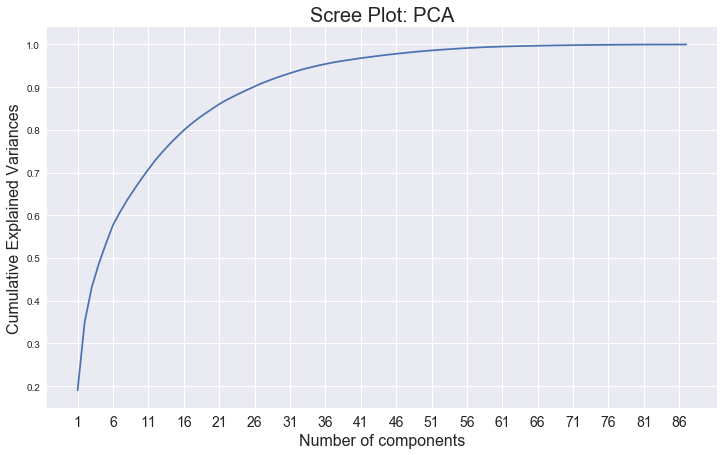

In [95]:
# Fit pipeline with training data
pca_np_train = pca_pipeline_1.fit_transform(X_train)

# Store PCA model
pca_res = pca_pipeline_1.named_steps['pca']

# Scree plot
get_scree_plot(pca_res)

In [96]:
# Find at how many components do we get the desired target variances
desired_variance = 90.0
exp_var = pd.Series(np.round(pca_res.explained_variance_ratio_.cumsum(), 3)*100)
exp_var[exp_var>=desired_variance].head(2)

25    90.2
26    90.9
dtype: float64

**Observation:** With 25 variables, 90% variance is explained. The steps to get here is shown below.
- We started with 224 features. 
- After data cleanup and EDA we had 145 features. 
- After derived features creation, we had 90 features.
- Finally after PCA, we have 25 features explaining 90% of the variances in the model.

In [97]:
# Let us check if the PCA components are making sense

pca_df = pd.DataFrame({'PC1':pca_res.components_[0],'PC2':pca_res.components_[1], 
                       'PC3':pca_res.components_[2],'PC4':pca_res.components_[3],
                       'PC5':pca_res.components_[4],'Feature Names':list(X_train.columns)})
pca_df.head(6)

,PC1,PC2,PC3,PC4,PC5,Feature Names
0,0.143601,0.028986,0.180752,0.017700,-0.065010,arpu_8
1,0.185765,-0.120172,0.140407,-0.357762,0.006278,onnet_mou_8
2,0.228525,-0.014095,0.108096,0.302827,-0.157375,offnet_mou_8
3,0.010619,-0.009771,0.017985,0.031215,0.071582,roam_ic_mou_8
4,0.019501,-0.026553,0.020775,0.029936,0.049835,roam_og_mou_8
5,0.115446,0.091777,0.004049,-0.144401,-0.131058,loc_og_t2t_mou_8


In [98]:
# Descriptive Statistics of pca_df

pca_df.describe()

,PC1,PC2,PC3,PC4,PC5
count,87.000000,87.000000,87.000000,87.000000,87.000000
mean,0.048338,0.032231,0.052339,0.002063,0.017797
std,0.096251,0.102845,0.094110,0.107813,0.106337
min,-0.146461,-0.247349,-0.071906,-0.363125,-0.231205
25%,0.005608,-0.009286,-0.003304,-0.010606,-0.029670
50%,0.021876,0.010938,0.017985,0.002529,0.006499
75%,0.134352,0.106396,0.085366,0.021797,0.069251
max,0.276640,0.245601,0.354942,0.331815,0.323988


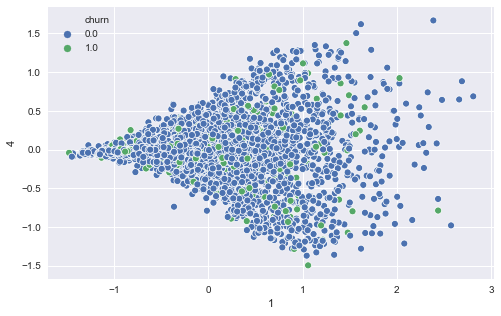

In [99]:
# Pair plot of 2 PCA components to visualize the results

df_pca = pd.DataFrame(pca_np_train, columns = range(1,88,1))
df_pca['churn'] = y_train
plt.figure(figsize=[8,5])
sns.scatterplot(data = df_pca, x =1, y =4, hue='churn')
plt.show()

**Observation:** PCA looks fine.

### 4.4: Model-1: PCA with 25 features, Logistic Regression, Class Weight Balanced

In [100]:
# Check y_train class imbalance
y_train['churn'].value_counts()

0    19260
1     1740
Name: churn, dtype: int64

In [101]:
# Pipeline for Model-1

feature_count_PCA = 25
model_1_pipeline = Pipeline([('scaler', MinMaxScaler()),
                           ('pca', PCA(n_components = feature_count_PCA, random_state=42, svd_solver='full')),
                            ('log_reg', LogisticRegression(class_weight='balanced'))])

In [102]:
# Fit pipeline with training data
model_1_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('pca',
                 PCA(n_components=25, random_state=42, svd_solver='full')),
                ('log_reg', LogisticRegression(class_weight='balanced'))])

In [103]:
# Predict for test dataset - Probablity of being 1 i.e. Churn
y_test_pred_prob = model_1_pipeline.predict_proba(X_test)[:, 1]

# Create dataframe for y_test_pred
y_test_pred = pd.DataFrame()
y_test_pred['churn'] = y_test['churn']
y_test_pred['churn_prob'] = y_test_pred_prob

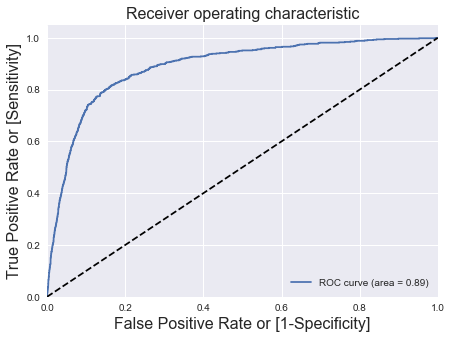

In [104]:
# Draw ROC Curve for Test Predictions

draw_roc(y_test_pred['churn'], y_test_pred['churn_prob'])

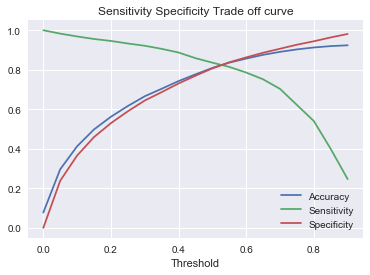

In [105]:
# Draw Sensitivity Specificity Tradeof for Test Predictions

df_cutoff = calc_sens_spec_tradeoff(y_test_pred,'churn', 'churn_prob',19)

**Observation:** More important to identify churners than the non-churners accurately. Let us select threshold 0.45 for model-1, which is slightly lower than optimium value of 0.5

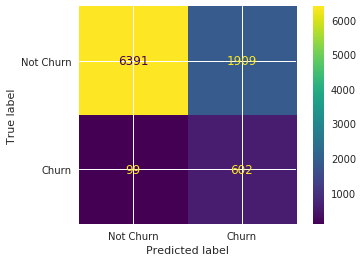

In [106]:
# Create a new column with optimial threshold
cut_off = 0.45
y_test_pred['churn_predicted'] = y_test_pred['churn_prob'].apply(lambda x: 1 if x>cut_off else 0)

# Plot Confusion Matrix
confusion = confusion_matrix(y_test_pred['churn'], y_test_pred['churn_predicted'], labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = ['Not Churn', 'Churn'])
plt.rc('font', **font)
disp.plot()
plt.show()

##### Choice of Metrics:

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>    
    
- Accuracy. Generally it is good to have this measure.
- Recall or Sensitivity. Helps to know what % of high value customers churn will the model detect.
- Precision. Helps to know out of the high value customers predicted as churn, what % of them might actually churn
- F1 score. Gives a balanced picture of Recall and Precision
- AUC Score

In [107]:
# Create a dataframe to keep track of metrics
metrics_result_df = pd.DataFrame(columns = ['Model'])

In [108]:
# Call the custom function to calculate the metrics

temp_df = calc_METRICS(y_test_pred['churn'], y_test_pred['churn_predicted'], y_test_pred['churn_prob'])
metrics_result_df = pd.concat([metrics_result_df, temp_df], axis=0, ignore_index=True)
metrics_result_df['Model'].fillna('1: PCA, Logistic, Class Weight Balanced', inplace=True)
metrics_result_df

,Model,AUC,Accuracy,F1 Score,Precision,Recall & Sensitivity
0,"1: PCA, Logistic, Class Weight Balanced",0.889,0.777,0.375,0.24,0.859


### 4.5: Model-2: PCA, Logistic Regression, Hyper Parameter Tuning with Grid Search CV

**Observation:** Please note the following w.r.t Hyper Parameter Tuning for Logistic Regression:
- Unlike other ML models, Logistic regression does not have any critical hyperparameters to tune.
- Hyperparameter tuning is **not done** for logistic regression parameters like: solver, penalty strength. These are normally optimum and the value of doing an hyperparameter tuning on these parameters is not high.
- Hyperparameter tuning is **done** for 3 variables: PCA n_components, LogisticRegression class_weights, regularization penalty

In [109]:
# Grid Search Setup

# Dictionary with Grid Search Hyperparmaeter Tuning setup
params_dict = {'pca__n_components': [25, 50], 
          'log_reg__class_weight': [{0: x, 1: 1.0-x} for x in np.linspace(0.01,0.99,12)],
              'log_reg__C': [0.1, 0.5, 1, 10]}

# Pipeline for Model-2
cv_pipeline = Pipeline([('scaler', MinMaxScaler()),
                           ('pca', PCA(random_state=42, svd_solver='randomized')),
                            ('log_reg', LogisticRegression())])

# Setup Folds for Cross Validation
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# Grid Search
gridsearch = GridSearchCV(estimator= cv_pipeline, param_grid= params_dict, cv=folds, n_jobs=-1, scoring='roc_auc', verbose=1)

In [110]:
%%time
# Fit gridsearch with training data
gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Wall time: 1min 28s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('pca',
                                        PCA(random_state=42,
                                            svd_solver='randomized')),
                                       ('log_reg', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'log_reg__C': [0.1, 0.5, 1, 10],
                         'log_reg__class_weight': [{0: 0.01, 1: 0.99},
                                                   {0: 0.09909090909090909,
                                                    1: 0.9009090909090909},
                                                   {...
                                                   {0: 0.4554545454545455,
                                                    1: 0.5445454545454544},
                                                   {0: 0.5445454545454546,
               

In [111]:
# Printing the best hyperparameter
print(gridsearch.best_params_)
print(gridsearch.best_score_)

{'log_reg__C': 10, 'log_reg__class_weight': {0: 0.1881818181818182, 1: 0.8118181818181818}, 'pca__n_components': 50}
0.8966158794953512


In [112]:
# Create dataframe of the results

df_grid_search = pd.DataFrame(gridsearch.cv_results_)
df_grid_search.sort_values(by='rank_test_score', ascending=True).head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_log_reg__C,param_log_reg__class_weight,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
77,1.752924,0.180430,0.054767,0.004531,10,"{0: 0.1881818181818182, 1: 0.8118181818181818}",50,"{'log_reg__C': 10, 'log_reg__class_weight': {0...",0.901428,0.901899,0.896361,0.886837,0.896554,0.896616,0.005418,1
53,1.523569,0.052727,0.050376,0.004840,1,"{0: 0.1881818181818182, 1: 0.8118181818181818}",50,"{'log_reg__C': 1, 'log_reg__class_weight': {0:...",0.901933,0.901328,0.896155,0.887498,0.895809,0.896545,0.005185,2
51,1.427269,0.020277,0.053124,0.007654,1,"{0: 0.09909090909090909, 1: 0.9009090909090909}",50,"{'log_reg__C': 1, 'log_reg__class_weight': {0:...",0.901721,0.901372,0.895795,0.887734,0.895815,0.896487,0.005075,3


In [113]:
# Based on Grid Search CV
feature_count_PCA = 50
weights = {0: 0.18, 1: 0.82}
C_val = 1.0

# Pipeline for Model-2
model_2_pipeline = Pipeline([('scaler', MinMaxScaler()),
                           ('pca', PCA(n_components = feature_count_PCA, random_state=42, svd_solver='randomized')),
                            ('log_reg', LogisticRegression(class_weight=weights, C=C_val))])

In [114]:
# Fit pipeline with training data
model_2_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('pca',
                 PCA(n_components=50, random_state=42,
                     svd_solver='randomized')),
                ('log_reg',
                 LogisticRegression(class_weight={0: 0.18, 1: 0.82}))])

In [115]:
# Predict for test dataset - Probablity of being 1 i.e. Churn
y_test_pred_prob = model_2_pipeline.predict_proba(X_test)[:, 1]

# Create dataframe for y_test_pred
y_test_pred = pd.DataFrame()
y_test_pred['churn'] = y_test['churn']
y_test_pred['churn_prob'] = y_test_pred_prob

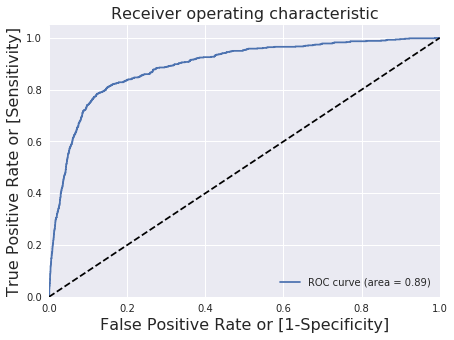

In [116]:
# Draw ROC Curve for Test Predictions

draw_roc(y_test_pred['churn'], y_test_pred['churn_prob'])

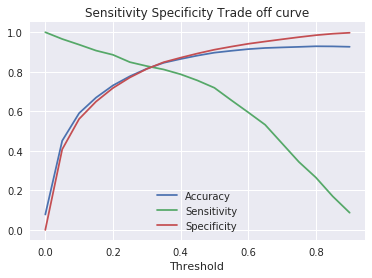

In [117]:
# Draw Sensitivity Specificity Tradeof for Test Predictions

df_cutoff = calc_sens_spec_tradeoff(y_test_pred,'churn', 'churn_prob',19)

**Observation:** Let us select threshold 0.25 for model-2

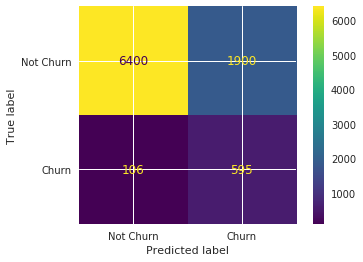

In [118]:
# Create a new column with optimial threshold
cut_off = 0.25
y_test_pred['churn_predicted'] = y_test_pred['churn_prob'].apply(lambda x: 1 if x>cut_off else 0)

# Plot Confusion Matrix
confusion = confusion_matrix(y_test_pred['churn'], y_test_pred['churn_predicted'], labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = ['Not Churn', 'Churn'])
plt.rc('font', **font)
disp.plot()
plt.show()

In [119]:
# Call the custom function to calculate the metrics

temp_df = calc_METRICS(y_test_pred['churn'], y_test_pred['churn_predicted'], y_test_pred['churn_prob'])
metrics_result_df = pd.concat([metrics_result_df, temp_df], axis=0, ignore_index=True)
metrics_result_df['Model'].fillna('2: PCA, Logistic, Hyper Parameter Tuned', inplace=True)
metrics_result_df

,Model,AUC,Accuracy,F1 Score,Precision,Recall & Sensitivity
0,"1: PCA, Logistic, Class Weight Balanced",0.889,0.777,0.375,0.240,0.859
1,"2: PCA, Logistic, Hyper Parameter Tuned",0.892,0.777,0.372,0.238,0.849


### 4.6: Model-3: Undersampling, PCA, Logistic Regression, Hyper Parameter Tuning with Grid Search CV

In [120]:
# RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Create dataframes for undersampling
random_under_sampling = RandomUnderSampler(random_state=42, replacement=True) # Replacement set to true
X_train_under, y_train_under = random_under_sampling.fit_resample(X_train, y_train)

print('Original Dataset:', Counter(y_train.churn))
print('Undersampled Dataset', Counter(y_train_under.churn))

Original Dataset: Counter({0: 19260, 1: 1740})
Undersampled Dataset Counter({0: 1740, 1: 1740})


In [121]:
# Grid Search Setup

# Dictionary with Grid Search Hyperparmaeter Tuning setup
params_dict = {'pca__n_components': [25, 50, 60, 75],'log_reg__C': [100, 10, 1.0, 0.1, 0.01]}

# Pipeline for Model-2
cv_pipeline = Pipeline([('scaler', MinMaxScaler()),
                           ('pca', PCA(random_state=42, svd_solver='randomized')),
                            ('log_reg', LogisticRegression())])

# Setup Folds for Cross Validation
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# Grid Search
gridsearch = GridSearchCV(estimator= cv_pipeline, param_grid= params_dict, cv=folds, n_jobs=-1, scoring='roc_auc', verbose=1)

In [122]:
%%time
# Fit gridsearch with training data
gridsearch.fit(X_train_under, y_train_under)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Wall time: 4.31 s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('pca',
                                        PCA(random_state=42,
                                            svd_solver='randomized')),
                                       ('log_reg', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'log_reg__C': [100, 10, 1.0, 0.1, 0.01],
                         'pca__n_components': [25, 50, 60, 75]},
             scoring='roc_auc', verbose=1)

In [123]:
# Printing the best hyperparameter
print(gridsearch.best_params_)
print(gridsearch.best_score_)

{'log_reg__C': 1.0, 'pca__n_components': 75}
0.8915906989034218


In [124]:
# Create dataframe of the results

df_grid_search = pd.DataFrame(gridsearch.cv_results_)
df_grid_search.sort_values(by='rank_test_score', ascending=True).head(4)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_log_reg__C,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,0.362377,0.011630,0.022787,0.001165,1,75,"{'log_reg__C': 1.0, 'pca__n_components': 75}",0.923925,0.884001,0.881193,0.882473,0.886362,0.891591,0.016259,1
7,0.503904,0.021055,0.025384,0.003824,10,75,"{'log_reg__C': 10, 'pca__n_components': 75}",0.923801,0.883389,0.881986,0.883092,0.885660,0.891586,0.016152,2
3,0.490850,0.020696,0.025266,0.003380,100,75,"{'log_reg__C': 100, 'pca__n_components': 75}",0.923496,0.882283,0.881903,0.882778,0.883191,0.890730,0.016388,3
10,0.300216,0.007495,0.022787,0.001165,1,60,"{'log_reg__C': 1.0, 'pca__n_components': 60}",0.923041,0.882902,0.879979,0.881457,0.885396,0.890555,0.016341,4


In [125]:
# Based on Grid Search CV
feature_count_PCA = 60 # 75 and 60 are almost same roc_auc score. Hence choose 60.
C_val = 1.0

# Pipeline for Model-2
model_3_pipeline = Pipeline([('scaler', MinMaxScaler()),
                           ('pca', PCA(n_components = feature_count_PCA, random_state=42, svd_solver='randomized')),
                            ('log_reg', LogisticRegression(C=C_val))])

In [126]:
# Fit pipeline with training data
model_3_pipeline.fit(X_train_under, y_train_under)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('pca',
                 PCA(n_components=60, random_state=42,
                     svd_solver='randomized')),
                ('log_reg', LogisticRegression())])

In [127]:
# Predict for test dataset - Probablity of being 1 i.e. Churn
y_test_pred_prob = model_3_pipeline.predict_proba(X_test)[:, 1]

# Create dataframe for y_test_pred
y_test_pred = pd.DataFrame()
y_test_pred['churn'] = y_test['churn']
y_test_pred['churn_prob'] = y_test_pred_prob

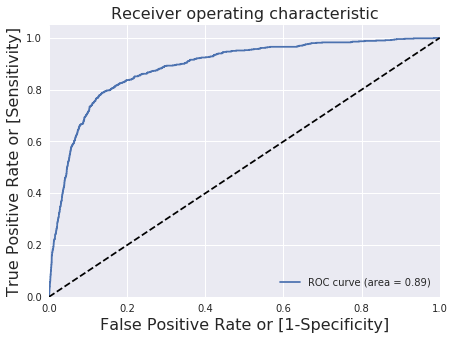

In [128]:
# Draw ROC Curve for Test Predictions

draw_roc(y_test_pred['churn'], y_test_pred['churn_prob'])

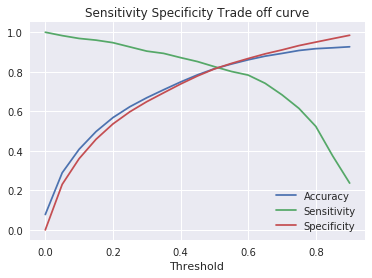

In [129]:
# Draw Sensitivity Specificity Tradeof for Test Predictions

df_cutoff = calc_sens_spec_tradeoff(y_test_pred,'churn', 'churn_prob',19)

**Observation:** Let us retain threshold 0.45 for model-3, 4 and 5 - so that we are consistent with model-1

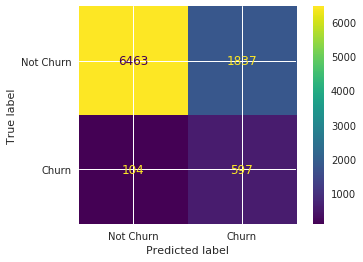

In [130]:
# Create a new column with optimial threshold
cut_off = 0.45
y_test_pred['churn_predicted'] = y_test_pred['churn_prob'].apply(lambda x: 1 if x>cut_off else 0)

# Plot Confusion Matrix
confusion = confusion_matrix(y_test_pred['churn'], y_test_pred['churn_predicted'], labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = ['Not Churn', 'Churn'])
plt.rc('font', **font)
disp.plot()
plt.show()

In [131]:
# Call the custom function to calculate the metrics

temp_df = calc_METRICS(y_test_pred['churn'], y_test_pred['churn_predicted'], y_test_pred['churn_prob'])
metrics_result_df = pd.concat([metrics_result_df, temp_df], axis=0, ignore_index=True)
metrics_result_df['Model'].fillna('3: RandomUnderSampler, PCA, Logistic, Hyper Parameter Tuned', inplace=True)
metrics_result_df

,Model,AUC,Accuracy,F1 Score,Precision,Recall & Sensitivity
0,"1: PCA, Logistic, Class Weight Balanced",0.889,0.777,0.375,0.240,0.859
1,"2: PCA, Logistic, Hyper Parameter Tuned",0.892,0.777,0.372,0.238,0.849
2,"3: RandomUnderSampler, PCA, Logistic, Hyper Pa...",0.888,0.784,0.381,0.245,0.852


### 4.7: Model-4: Oversampling, PCA, Logistic Regression, Hyper Parameter Tuning with Grid Search CV

In [132]:
# RandomOverSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Create dataframes for undersampling
random_over_sampling = RandomOverSampler(sampling_strategy='auto', random_state=42) # Replacement set to true
X_train_over, y_train_over = random_over_sampling.fit_resample(X_train, y_train)

print('Original Dataset:', Counter(y_train.churn))
print('Oversampled Dataset', Counter(y_train_over.churn))


Original Dataset: Counter({0: 19260, 1: 1740})
Oversampled Dataset Counter({1: 19260, 0: 19260})


In [133]:
# Based on Grid Search CV of undersampling since it will be nearly same.
feature_count_PCA = 60
C_val = 1.0

# Pipeline for Model-4
model_4_pipeline = Pipeline([('scaler', MinMaxScaler()),
                           ('pca', PCA(n_components = feature_count_PCA, random_state=42, svd_solver='randomized')),
                            ('log_reg', LogisticRegression(C=C_val))])

In [134]:
# Fit pipeline with training data
model_4_pipeline.fit(X_train_over, y_train_over)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('pca',
                 PCA(n_components=60, random_state=42,
                     svd_solver='randomized')),
                ('log_reg', LogisticRegression())])

In [135]:
# Predict for test dataset - Probablity of being 1 i.e. Churn
y_test_pred_prob = model_4_pipeline.predict_proba(X_test)[:, 1]

# Create dataframe for y_test_pred
y_test_pred = pd.DataFrame()
y_test_pred['churn'] = y_test['churn']
y_test_pred['churn_prob'] = y_test_pred_prob

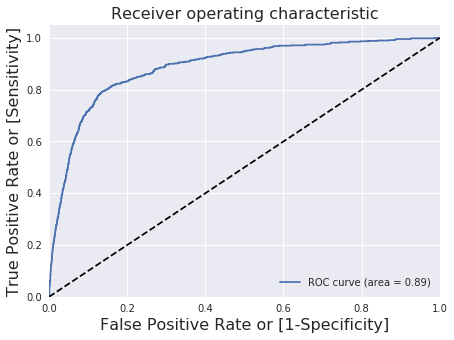

In [136]:
# Draw ROC Curve for Test Predictions

draw_roc(y_test_pred['churn'], y_test_pred['churn_prob'])

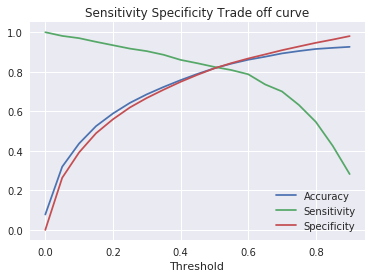

In [137]:
# Draw Sensitivity Specificity Tradeof for Test Predictions

df_cutoff = calc_sens_spec_tradeoff(y_test_pred,'churn', 'churn_prob',19)

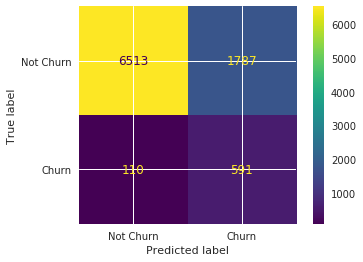

In [138]:
# Create a new column with optimial threshold
cut_off = 0.45
y_test_pred['churn_predicted'] = y_test_pred['churn_prob'].apply(lambda x: 1 if x>cut_off else 0)

# Plot Confusion Matrix
confusion = confusion_matrix(y_test_pred['churn'], y_test_pred['churn_predicted'], labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = ['Not Churn', 'Churn'])
plt.rc('font', **font)
disp.plot()
plt.show()

In [139]:
# Call the custom function to calculate the metrics

temp_df = calc_METRICS(y_test_pred['churn'], y_test_pred['churn_predicted'], y_test_pred['churn_prob'])
metrics_result_df = pd.concat([metrics_result_df, temp_df], axis=0, ignore_index=True)
metrics_result_df['Model'].fillna('4: RandomOverSampler, PCA, Logistic, Hyper Parameter Tuned', inplace=True)
metrics_result_df

,Model,AUC,Accuracy,F1 Score,Precision,Recall & Sensitivity
0,"1: PCA, Logistic, Class Weight Balanced",0.889,0.777,0.375,0.240,0.859
1,"2: PCA, Logistic, Hyper Parameter Tuned",0.892,0.777,0.372,0.238,0.849
2,"3: RandomUnderSampler, PCA, Logistic, Hyper Pa...",0.888,0.784,0.381,0.245,0.852
3,"4: RandomOverSampler, PCA, Logistic, Hyper Par...",0.888,0.789,0.384,0.249,0.843


### 4.8: Model-5: SMOTE, PCA, Logistic Regression, Hyper Parameter Tuning with Grid Search CV

In [140]:
# RandomOverSampler
from imblearn.over_sampling import SMOTE
from collections import Counter

# Create dataframes for undersampling
SMOTE_sampling = SMOTE()
X_train_smote, y_train_smote = SMOTE_sampling.fit_resample(X_train, y_train)

print('Original Dataset:', Counter(y_train.churn))
print('SMOTE Dataset', Counter(y_train_smote.churn))


Original Dataset: Counter({0: 19260, 1: 1740})
SMOTE Dataset Counter({1: 19260, 0: 19260})


In [141]:
# Based on Grid Search CV
feature_count_PCA = 60
C_val = 1.0

# Pipeline for Model-5
model_5_pipeline = Pipeline([('scaler', MinMaxScaler()),
                           ('pca', PCA(n_components = feature_count_PCA, random_state=42, svd_solver='randomized')),
                            ('log_reg', LogisticRegression(C=C_val))])

In [142]:
# Fit pipeline with training data
model_5_pipeline.fit(X_train_smote, y_train_smote)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('pca',
                 PCA(n_components=60, random_state=42,
                     svd_solver='randomized')),
                ('log_reg', LogisticRegression())])

In [143]:
# Predict for test dataset - Probablity of being 1 i.e. Churn
y_test_pred_prob = model_5_pipeline.predict_proba(X_test)[:, 1]

# Create dataframe for y_test_pred
y_test_pred = pd.DataFrame()
y_test_pred['churn'] = y_test['churn']
y_test_pred['churn_prob'] = y_test_pred_prob

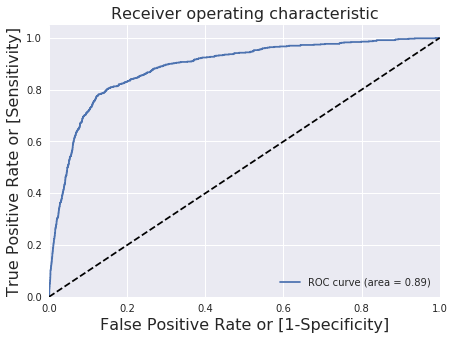

In [144]:
# Draw ROC Curve for Test Predictions

draw_roc(y_test_pred['churn'], y_test_pred['churn_prob'])

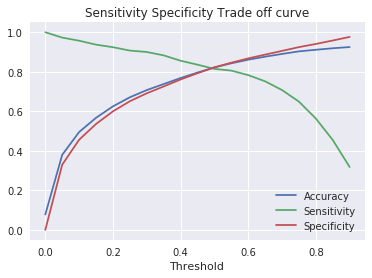

In [145]:
# Draw Sensitivity Specificity Tradeof for Test Predictions

df_cutoff = calc_sens_spec_tradeoff(y_test_pred,'churn', 'churn_prob',19)

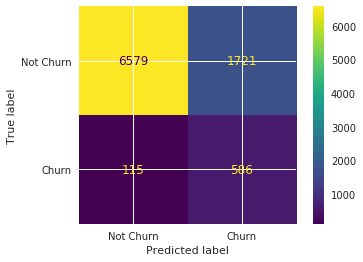

In [146]:
# Create a new column with optimial threshold
cut_off = 0.45
y_test_pred['churn_predicted'] = y_test_pred['churn_prob'].apply(lambda x: 1 if x>cut_off else 0)

# Plot Confusion Matrix
confusion = confusion_matrix(y_test_pred['churn'], y_test_pred['churn_predicted'], labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = ['Not Churn', 'Churn'])
plt.rc('font', **font)
disp.plot()
plt.show()

In [147]:
# Call the custom function to calculate the metrics

temp_df = calc_METRICS(y_test_pred['churn'], y_test_pred['churn_predicted'], y_test_pred['churn_prob'])
metrics_result_df = pd.concat([metrics_result_df, temp_df], axis=0, ignore_index=True)
metrics_result_df['Model'].fillna('5: SMOTE, PCA, Logistic, Hyper Parameter Tuned', inplace=True)
metrics_result_df

,Model,AUC,Accuracy,F1 Score,Precision,Recall & Sensitivity
0,"1: PCA, Logistic, Class Weight Balanced",0.889,0.777,0.375,0.240,0.859
1,"2: PCA, Logistic, Hyper Parameter Tuned",0.892,0.777,0.372,0.238,0.849
2,"3: RandomUnderSampler, PCA, Logistic, Hyper Pa...",0.888,0.784,0.381,0.245,0.852
3,"4: RandomOverSampler, PCA, Logistic, Hyper Par...",0.888,0.789,0.384,0.249,0.843
4,"5: SMOTE, PCA, Logistic, Hyper Parameter Tuned",0.887,0.796,0.390,0.254,0.836


### 4.9: Model-6: PCA, Random Forest, Hyper Parameter Tuning with Grid Search CV

In [148]:
# Grid Search Setup

# Dictionary with Grid Search Hyperparmaeter Tuning setup
params_dict = {'forest__n_estimators': [100, 200, 300],
               'forest__max_depth': [5, 10],
               'forest__max_features': [10, 15, 20],
               'forest__min_samples_leaf': [100, 200],
               'forest__min_samples_split': [100, 200]}
feature_count_PCA=60

# Pipeline
cv_pipeline = Pipeline([('scaler', StandardScaler()),
                           ('pca', PCA(n_components = feature_count_PCA, random_state=42, svd_solver='randomized')),
                            ('forest', RandomForestClassifier(class_weight='balanced', oob_score=True))])

# Setup Folds for Cross Validation
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# Grid Search
gridsearch = GridSearchCV(estimator= cv_pipeline, 
                          param_grid= params_dict, 
                          cv=folds, 
                          n_jobs=-1, 
                          scoring='accuracy', 
                          verbose=2)

In [149]:
%%time
# Fit gridsearch with training data
gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Wall time: 40min 47s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca',
                                        PCA(n_components=60, random_state=42,
                                            svd_solver='randomized')),
                                       ('forest',
                                        RandomForestClassifier(class_weight='balanced',
                                                               oob_score=True))]),
             n_jobs=-1,
             param_grid={'forest__max_depth': [5, 10],
                         'forest__max_features': [10, 15, 20],
                         'forest__min_samples_leaf': [100, 200],
                         'forest__min_samples_split': [100, 200],
                         'forest__n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [150]:
# Printing the best hyperparameter
print(gridsearch.best_params_)
print(gridsearch.best_score_)

{'forest__max_depth': 10, 'forest__max_features': 10, 'forest__min_samples_leaf': 100, 'forest__min_samples_split': 200, 'forest__n_estimators': 200}
0.8800000000000001


In [151]:
# Create dataframe of the results

df_grid_search = pd.DataFrame(gridsearch.cv_results_)
df_grid_search.sort_values(by='rank_test_score', ascending=True).head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_forest__max_depth,param_forest__max_features,param_forest__min_samples_leaf,param_forest__min_samples_split,param_forest__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
40,43.901862,0.673734,0.264438,0.006737,10,10,100,200,200,"{'forest__max_depth': 10, 'forest__max_feature...",0.882857,0.877143,0.877857,0.880952,0.881190,0.880000,0.002156,1
41,66.035881,0.748342,0.375770,0.005212,10,10,100,200,300,"{'forest__max_depth': 10, 'forest__max_feature...",0.883571,0.875000,0.874524,0.882143,0.880952,0.879238,0.003751,2
39,22.472411,0.084724,0.143712,0.001166,10,10,100,200,100,"{'forest__max_depth': 10, 'forest__max_feature...",0.885714,0.874524,0.874048,0.878810,0.882143,0.879048,0.004462,3


In [152]:
# Based on Grid Search CV
val_n_estimators = 200
val_max_depth = 10
val_max_features = 10
val_min_samples_leaf = 100
val_min_samples_split = 100
feature_count_PCA=60

# Pipeline for Model-2
model_6_pipeline = Pipeline([('scaler', MinMaxScaler()),
                           ('pca', PCA(n_components = feature_count_PCA, random_state=42, svd_solver='randomized')),
                            ('forest', RandomForestClassifier(class_weight='balanced', 
                                                              oob_score=True, 
                                                              bootstrap=True, 
                                                              n_estimators = val_n_estimators,
                                                              max_depth = val_max_depth,
                                                              max_features=val_max_features,
                                                              min_samples_leaf=val_min_samples_leaf, 
                                                              min_samples_split=val_min_samples_split))])

In [153]:
# Fit pipeline with training data
model_6_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('pca',
                 PCA(n_components=60, random_state=42,
                     svd_solver='randomized')),
                ('forest',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        max_features=10, min_samples_leaf=100,
                                        min_samples_split=100, n_estimators=200,
                                        oob_score=True))])

In [154]:
# Predict for test dataset
y_test_pred_1 = model_6_pipeline.predict(X_test)

# Create dataframe for y_test_pred
y_test_pred = pd.DataFrame()
y_test_pred['churn'] = y_test['churn']
y_test_pred['churn_predicted'] = y_test_pred_1

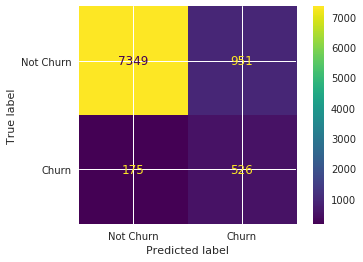

In [155]:
# Plot Confusion Matrix
confusion = confusion_matrix(y_test_pred['churn'], y_test_pred['churn_predicted'], labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = ['Not Churn', 'Churn'])
plt.rc('font', **font)
disp.plot()
plt.show()

In [156]:
# Call the custom function to calculate the metrics

from sklearn import metrics
accuracy = metrics.accuracy_score(y_test_pred['churn'],y_test_pred['churn_predicted']).round(3)
precision = metrics.precision_score(y_test_pred['churn'],y_test_pred['churn_predicted']).round(3)
recall = metrics.recall_score(y_test_pred['churn'],y_test_pred['churn_predicted']).round(3)
f1_score = (2*(precision*recall)/(precision+recall)).round(3)
auc_score = 'NA'

new_row = {'Model': '6: PCA, RandomForest, Hyper Parameter Tuned, Class Weight Balanced', 
           'AUC': auc_score, 'Accuracy': accuracy, 'F1 Score': f1_score, 'Precision': precision, 'Recall & Sensitivity': recall}
metrics_result_df = metrics_result_df.append(new_row, ignore_index=True)
metrics_result_df

,Model,AUC,Accuracy,F1 Score,Precision,Recall & Sensitivity
0,"1: PCA, Logistic, Class Weight Balanced",0.889,0.777,0.375,0.240,0.859
1,"2: PCA, Logistic, Hyper Parameter Tuned",0.892,0.777,0.372,0.238,0.849
2,"3: RandomUnderSampler, PCA, Logistic, Hyper Pa...",0.888,0.784,0.381,0.245,0.852
3,"4: RandomOverSampler, PCA, Logistic, Hyper Par...",0.888,0.789,0.384,0.249,0.843
4,"5: SMOTE, PCA, Logistic, Hyper Parameter Tuned",0.887,0.796,0.390,0.254,0.836
5,"6: PCA, RandomForest, Hyper Parameter Tuned, C...",NA,0.875,0.483,0.356,0.750


### 4.10: Summary : Goal-1 of Churn Prediction

##### Goal-1: Churn Prediction:

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>    

1. PCA with LogisticRegression is a better option for this problem compared to PCA with RandomForest.
    - PCA with LogisticRegression gives higher Recall & Sensitivity
    - Consumes less computational resource.
2. For this problem the analysis suggests that class_weight='balanced' is better option compared to class imbalance techniques such as undersampling, oversampling, SMOTE or even manually specified class weights based on Hyper Parameter Tuning
    - Sensitivity is more or less similar
    - class_weight='balanced' is simple
3. Based on Recall & Sensitivity as metrics and amongst the classification models investigated, it seems that the high performance model for churn prediction of high value customers is as follows:
    - Model 1
    - PCA preceeded by MinMaxScaler
    - Logistic Regression with threshold of 0.45
    - feature_count_PCA = 25
    - class_weight='balanced'

In [157]:
# Print Metrics of the Final Model for Goal-1:
metrics_result_df[metrics_result_df.index == 0]

,Model,AUC,Accuracy,F1 Score,Precision,Recall & Sensitivity
0,"1: PCA, Logistic, Class Weight Balanced",0.889,0.777,0.375,0.24,0.859


**Final Result: Recall & Senstivity of 86%, but due to low precision levels the F1 score is about 37.5%.**

## 5: Goal-2: Identify important predictor attributes

In [158]:
# First few lines of the data
cust.head()

,mobile_number,circle_id,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,aon,vbc_3g_8,churn,remaining_days_after_last_rech_8,count_rech_2g_and_3g_8,vol_2g_and_3g_mb_8,monthly_2g_and_3g_8,sachet_2g_and_3g_8,arpu_avg_67,onnet_mou_avg_67,offnet_mou_avg_67,roam_ic_mou_avg_67,roam_og_mou_avg_67,loc_og_t2t_mou_avg_67,loc_og_t2m_mou_avg_67,loc_og_t2f_mou_avg_67,loc_og_t2c_mou_avg_67,loc_og_mou_avg_67,std_og_t2t_mou_avg_67,std_og_t2m_mou_avg_67,std_og_t2f_mou_avg_67,std_og_mou_avg_67,isd_og_mou_avg_67,spl_og_mou_avg_67,og_others_avg_67,total_og_mou_avg_67,loc_ic_t2t_mou_avg_67,loc_ic_t2m_mou_avg_67,loc_ic_t2f_mou_avg_67,loc_ic_mou_avg_67,std_ic_t2t_mou_avg_67,std_ic_t2m_mou_avg_67,std_ic_t2f_mou_avg_67,std_ic_mou_avg_67,total_ic_mou_avg_67,spl_ic_mou_avg_67,isd_ic_mou_avg_67,ic_others_avg_67,total_rech_num_avg_67,total_rech_amt_avg_67,max_rech_amt_avg_67,last_day_rch_amt_avg_67,total_rech_data_avg_67,max_rech_data_avg_67,av_rech_amt_data_avg_67,vbc_3g_avg_67,remaining_days_after_last_rech_avg_67,count_rech_2g_and_3g_avg_67,vol_2g_and_3g_mb_avg_67,monthly_2g_and_3g_avg_67,sachet_2g_and_3g_avg_67
0,7000842753,109,213.803000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.16,4.13,1.15,5.44,0.00,0.00,0.00,0.00,5.44,0.0,0.00,0.00,2,252,252,252,1.0,252.0,252.0,968,30.40,1,19.988317,1,115.36,1,0,206.1005,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.00,0.000,0.000,0.00,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3,307,252,252,1.0,252.0,252.0,50.600,12.000000,1,132.890,1,0
7,7000701601,109,2014.483901,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.0,0.0,0.0,802,57.74,1,5.000000,0,0.00,0,0,1209.5150,56.26,510.295,24.86,18.165,41.385,378.005,58.635,0.0,478.035,13.795,40.825,13.37,68.000,0.090,2.25,0.0,548.385,45.200,219.525,126.810,391.555,24.360,109.215,43.215,176.810,592.250,0.105,8.295,15.465,5,1185,1185,0,0.0,0.0,0.0,19.060,4.500000,0,0.000,0,0
8,7001524846,109,137.362000,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14,120,30,10,3.0,23.0,69.0,315,21.03,0,1.000000,3,11.97,0,3,435.4720,382.36,87.645,0.00,0.000,257.360,75.770,0.000,0.0,333.135,124.995,11.865,0.00,136.870,0.000,0.00,0.0,470.010,16.840,35.780,0.000,52.630,0.290,13.255,0.000,13.545,66.175,0.000,0.000,0.000,20,519,122,25,1.0,77.0,88.5,516.405,2.500000,1,553.475,0,0
21,7002124215,109,637.760000,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,938.79,0.00,0.00,0.0,1068.54,19.54,129.16,10.39,159.11,0.18,101.74,0.00,101.93,261.04,0.0,0.00,0.00,27,718,50,50,0.0,0.0,0.0,720,0.00,0,0.000000,0,0.00,0,0,556.1030,117.26,827.305,0.00,0.000,5.320,89.870,0.375,0.0,95.565,111.935,737.050,0.00,848.990,0.000,0.00,0.0,944.565,6.335,96.430,3.725,106.505,10.020,52.960,0.000,62.985,169.490,0.000,0.000,0.000,24,640,50,25,0.0,0.0,0.0,0.000,0.000000,0,0.000,0,0
23,7000887461,109,366.966000,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,182.14,0.00,39.61,0.00,39.61,0.00,17.71,0.0,239.48,76.64,146.84,0.71,224.21,13.38,43.91,0.00,57.29,298.33,0.0,3.74,13.06,4,439,179,0,2.0,179.0,270.0,604,40.45,0,7.000000,2,1009.93,1,1,134.1235,49.81,87.385,0.00,0.000,49.810,82.975,0.000,0.0,132.795,0.000,4.355,0.00,4.355,0.005,0.05,0.0,137.210,40.875

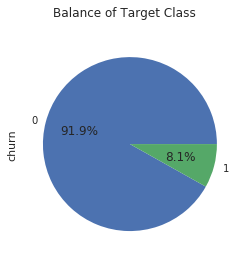

In [159]:
# Checking Balance of Target Class
plt.suptitle('Balance of Target Class', fontsize = 12)
cust['churn'].value_counts(normalize = True).plot.pie(autopct='%1.1f%%')
plt.show()

**Observation:** 
    
we can see that Target class is highly imbalanced where 91.9% of the cases are non churn cases.

### Splitting data into Test-Train datasets

In [160]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.3, random_state = 42)

### Feature Scaling

In [161]:
# Scaling of  variables using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

cols = X_train.columns
sc = MinMaxScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train), columns=cols)
X_test = pd.DataFrame(sc.transform(X_test), columns=cols)

In [162]:
# Check the size of the train and test dataset for independent Variables
print (X_train.shape, X_test.shape)

(21000, 87) (9001, 87)


In [163]:
# Check the size of the train and test dataset for dependent Variables
print (y_train.shape, y_test.shape)

(21000, 1) (9001, 1)


In [164]:
y_train=y_train.values.reshape(-1,1)

## 5.1: Logistic Regression without PCA

### 5.1.1 Model-1: building the first training model with all variables

In [165]:
import statsmodels.api as sm

# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20913
Model Family:                Binomial   Df Model:                           86
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 22 May 2021   Deviance:                          nan
Time:                        16:14:07   Pearson chi2:                 8.64e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                 -2.377e+14   2.16e+06   -1.1e+08      0.000   -2.38e+14   -2.38e+14
arpu_8                                -1.101e+14   8.42e+06  -1.31e+07      0.000    -1.1e+14    -1.1e+14
onnet_mou_8                           -1.067e+15   1.67e+07  -6.39e+07      0.000   -1.07e+15   -1.07e+15
offnet_mou_8                          -7.361e+14   1.53e+07  -4.81e+07      0.000   -7.36e+14   -7.36e+14
roam_ic_mou_8                         -6.102e+14   5.65e+06  -1.08e+08      0.000    -6.1e+14    -6.1e+14
roam_og_mou_8                          1.048e+14   6.09e+06   1.72e+07      0.000    1.05e+14    1.05e+14
loc_og_t2t_mou_8                      -4.352e+14   1.31e+07  -3.32e+07      0.000   -4.35e+14   -4.35e+14
loc_og_t2m_mou_8                       -6.05e+14   1.29e+07   -4.7e+07      0.000   -6.05e+14   -6.05e+14
loc_og_t2f_mou_8                       4.946e+13    4.5e+06    1.1e+07      0.000    4.95e+13    4.95e+13
loc_og_t2c_mou_8                       7.787e+13   3.58e+06   2.18e+07      0.000    7.79e+13    7.79e+13
loc_og_mou_8                           1.462e+15   2.04e+07   7.18e+07      0.000    1.46e+15    1.46e+15
std_og_t2t_mou_8                       2.719e+13   1.61e+07   1.69e+06      0.000    2.72e+13    2.72e+13
std_og_t2m_mou_8                      -7.634e+14   1.47e+07  -5.18e+07      0.000   -7.63e+14   -7.63e+14
std_og_t2f_mou_8                      -1.473e+14   4.88e+06  -3.02e+07      0.000   -1.47e+14   -1.47e+14
std_og_mou_8                           1.482e+15   2.17e+07   6.82e+07      0.000    1.48e+15    1.48e+15
isd_og_mou_8                          -4.863e+14   1.12e+07  -4.36e+07      0.000   -4.86e+14   -4.86e+14
spl_og_mou_8                          -1.718e+14   4.09e+06   -4.2e+07      0.000   -1.72e+14   -1.72e+14
og_others_8                           -1.809e+14   1.52e+07  -1.19e+07      0.000   -1.81e+14   -1.81e+14
total_og_mou_8                        -3.678e+14   2.05e+07   -1.8e+07      0.000   -3.68e+14   -3.68e+14
loc_ic_t2t_mou_8                      -1.511e+15   9.86e+06  -1.53e+08      0.000   -1.51e+15   -1.51e+15
loc_ic_t2m_mou_8                       -2.15e+15   1.25e+07  -1.72e+08      0.000   -2.15e+15   -2.15e+15
loc_ic_t2f_mou_8                      -5.645e+14      5e+06  -1.13e+08      0.000   -5.64e+14   -5.64e+14
loc_ic_mou_8                           1.041e+15   2.04e+07   5.11e+07      0.000    1.04e+15    1.04e+15
std_ic_t2t_mou_8                      -1.001e+15   1.01e+07  -9.89e+07      0.000      -1e+15      -1e+15
std_ic_t2m_mou_8                      -8.989e+14   1.28e+07  -7.02e+07      0.000   -8.99e+14   -8.99e+14
std_ic_t2f_mou_8                      -5.235e+14    5.9e+06  -8.87e+07      0.000   -5.23e+14   -5.23e+14
std_ic_mo

Lets use Recursive Feature Elimination (RFE) to select top 15 features and thereafter we can explore the possibility of further feature elimination manually based on p-values(significance of features), VIFs (Multicolinearity) and feature importance

### 5.1.2 Model-2: Feature selection using RFE

In [166]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight = "balanced")

from sklearn.feature_selection import RFE
# running RFE with 15 variables as output
rfe = RFE(logreg, 15)            
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_8', False, 53),
 ('onnet_mou_8', False, 17),
 ('offnet_mou_8', False, 18),
 ('roam_ic_mou_8', False, 63),
 ('roam_og_mou_8', False, 16),
 ('loc_og_t2t_mou_8', False, 7),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_8', False, 43),
 ('loc_og_t2c_mou_8', False, 48),
 ('loc_og_mou_8', False, 15),
 ('std_og_t2t_mou_8', False, 10),
 ('std_og_t2m_mou_8', False, 8),
 ('std_og_t2f_mou_8', False, 37),
 ('std_og_mou_8', False, 11),
 ('isd_og_mou_8', False, 40),
 ('spl_og_mou_8', False, 47),
 ('og_others_8', False, 24),
 ('total_og_mou_8', False, 58),
 ('loc_ic_t2t_mou_8', True, 1),
 ('loc_ic_t2m_mou_8', True, 1),
 ('loc_ic_t2f_mou_8', False, 2),
 ('loc_ic_mou_8', True, 1),
 ('std_ic_t2t_mou_8', False, 31),
 ('std_ic_t2m_mou_8', False, 32),
 ('std_ic_t2f_mou_8', False, 33),
 ('std_ic_mou_8', True, 1),
 ('total_ic_mou_8', False, 60),
 ('spl_ic_mou_8', True, 1),
 ('isd_ic_mou_8', False, 70),
 ('ic_others_8', False, 61),
 ('total_rech_num_8', True, 1),
 ('total_rech_amt_8', False, 41),


In [167]:
# Selected Variables
col = X_train.columns[rfe.support_]

# Eliminated Variables
X_train.columns[~rfe.support_]

Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_8',
       'spl_og_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2f_mou_8',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8',
       'total_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_amt_8',
       'max_rech_amt_8', 'max_rech_data_8', 'av_rech_amt_data_8', 'aon',
       'vbc_3g_8', 'remaining_days_after_last_rech_8',
       'count_rech_2g_and_3g_8', 'monthly_2g_and_3g_8', 'sachet_2g_and_3g_8',
       'onnet_mou_avg_67', 'offnet_mou_avg_67', 'roam_ic_mou_avg_67',
       'roam_og_mou_avg_67', 'loc_og_t2t_mou_avg_67', 'loc_og_t2m_mou_avg_67',
       'loc_og_t2f_mou_avg_67', 'loc_og_t2c_mou_avg_67', 'loc_og_mou_avg_67',
       'std_og_t2t_mou_avg_67', 'std_og_t2m_mou_avg_67',
       'std_og_t2f_m

##### Assessing the model with StatsModels

In [168]:
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20984
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3967.0
Date:                Sat, 22 May 2021   Deviance:                       7934.0
Time:                        16:14:36   Pearson chi2:                 1.32e+07
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.3371      0.085    -15.815      0.000      -1.503      -1.171
loc_og_t2m_mou_8               -3.1034      0.450     -6.899      0.000      -3.985      -2.222
loc_ic_t2t_mou_8                0.5377      1.589      0.338      0.735      -2.578       3.653
loc_ic_t2m_mou_8                1.4357      2.277      0.630      0.528      -3.028       5.899
loc_ic_mou_8                  -11.6775      3.044     -3.836      0.000     -17.644      -5.711
std_ic_mou_8                   -3.1922      0.360     -8.876      0.000      -3.897      -2.487
spl_ic_mou_8                   -2.4879      0.344     -7.231      0.000      -3.162      -1.814
total_rech_num_8              -15.3851      1.213    -12.685      0.000     -17.762     -13.008
last_day_rch_amt_8            -18.5303      1.851    -10.009      0.000     -22.159     -14.902
total_rech_data_8              -3.0587      0.352     -8.684      0.000      -3.749      -2.368
vol_2g_and_3g_mb_8             -3.3497      0.443     -7.560      0.000      -4.218      -2.481
arpu_avg_67                     3.3530      0.238     14.081      0.000       2.886       3.820
total_ic_mou_avg_67             2.5376      0.240     10.584      0.000       2.068       3.008
max_rech_amt_avg_67             0.5382      0.688      0.783      0.434      -0.809       1.886
count_rech_2g_and_3g_avg_67    -7.0396      3.531     -1.994      0.046     -13.960      -0.119
sachet_2g_and_3g_avg_67        12.9380      3.537      3.658      0.000       6.006      19.870
===============================================================================================
"""

##### Let's check the VIFs

In [169]:
# This is a custom function to calculate VIF
def calc_VIF(X_train):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    df_vif = pd.DataFrame()
    df_vif['Features'] = X_train.columns
    df_vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    df_vif['VIF'] = round(df_vif['VIF'], 2)
    df_vif.sort_values(by='VIF', ascending=False, inplace=True)
    return df_vif

In [170]:
# Check VIF
vif=calc_VIF(X_train[col])
vif.head(7)

,Features,VIF
3,loc_ic_mou_8,43.32
13,count_rech_2g_and_3g_avg_67,35.60
14,sachet_2g_and_3g_avg_67,31.88
2,loc_ic_t2m_mou_8,24.93
1,loc_ic_t2t_mou_8,7.27
10,arpu_avg_67,6.65
11,total_ic_mou_avg_67,5.95


We can observe that few features have higher p-values, VIF etc. Lets drop the variable loc_ic_t2t_mou_8 which has higher p-value

#### Model-3

In [171]:
col = col.drop('loc_ic_t2t_mou_8', 1)
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20985
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3967.1
Date:                Sat, 22 May 2021   Deviance:                       7934.1
Time:                        16:14:36   Pearson chi2:                 1.28e+07
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.3373      0.085    -15.818      0.000      -1.503      -1.172
loc_og_t2m_mou_8               -3.1013      0.450     -6.897      0.000      -3.983      -2.220
loc_ic_t2m_mou_8                0.7743      1.145      0.676      0.499      -1.471       3.019
loc_ic_mou_8                  -10.7351      1.184     -9.065      0.000     -13.056      -8.414
std_ic_mou_8                   -3.1925      0.360     -8.879      0.000      -3.897      -2.488
spl_ic_mou_8                   -2.4875      0.344     -7.230      0.000      -3.162      -1.813
total_rech_num_8              -15.3623      1.211    -12.689      0.000     -17.735     -12.989
last_day_rch_amt_8            -18.5317      1.851    -10.011      0.000     -22.160     -14.904
total_rech_data_8              -3.0601      0.352     -8.688      0.000      -3.750      -2.370
vol_2g_and_3g_mb_8             -3.3519      0.443     -7.564      0.000      -4.220      -2.483
arpu_avg_67                     3.3555      0.238     14.097      0.000       2.889       3.822
total_ic_mou_avg_67             2.5356      0.240     10.579      0.000       2.066       3.005
max_rech_amt_avg_67             0.5259      0.686      0.766      0.444      -0.820       1.871
count_rech_2g_and_3g_avg_67    -7.0428      3.531     -1.995      0.046     -13.963      -0.122
sachet_2g_and_3g_avg_67        12.9401      3.537      3.659      0.000       6.009      19.872
===============================================================================================
"""

##### Let's check the VIFs

In [172]:
# Print VIF
vif=calc_VIF(X_train[col])
vif.head(5)

,Features,VIF
12,count_rech_2g_and_3g_avg_67,35.60
13,sachet_2g_and_3g_avg_67,31.88
2,loc_ic_mou_8,12.29
1,loc_ic_t2m_mou_8,9.84
9,arpu_avg_67,6.62


Lets drop loc_ic_t2m_mou_8 variable and recheck the model

#### Model-5

In [173]:
col = col.drop('loc_ic_t2m_mou_8', 1)
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20986
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3967.3
Date:                Sat, 22 May 2021   Deviance:                       7934.6
Time:                        16:14:37   Pearson chi2:                 1.31e+07
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.3355      0.084    -15.810      0.000      -1.501      -1.170
loc_og_t2m_mou_8               -3.0401      0.439     -6.927      0.000      -3.900      -2.180
loc_ic_mou_8                  -10.0525      0.596    -16.872      0.000     -11.220      -8.885
std_ic_mou_8                   -3.1909      0.359     -8.883      0.000      -3.895      -2.487
spl_ic_mou_8                   -2.4866      0.344     -7.227      0.000      -3.161      -1.812
total_rech_num_8              -15.3691      1.211    -12.690      0.000     -17.743     -12.995
last_day_rch_amt_8            -18.5653      1.851    -10.029      0.000     -22.193     -14.937
total_rech_data_8              -3.0587      0.352     -8.682      0.000      -3.749      -2.368
vol_2g_and_3g_mb_8             -3.3489      0.443     -7.558      0.000      -4.217      -2.480
arpu_avg_67                     3.3534      0.238     14.094      0.000       2.887       3.820
total_ic_mou_avg_67             2.5352      0.240     10.580      0.000       2.066       3.005
max_rech_amt_avg_67             0.5085      0.685      0.742      0.458      -0.835       1.852
count_rech_2g_and_3g_avg_67    -7.0318      3.530     -1.992      0.046     -13.950      -0.113
sachet_2g_and_3g_avg_67        12.9349      3.535      3.659      0.000       6.006      19.864
===============================================================================================
"""

In [174]:
# Print VIF
vif=calc_VIF(X_train[col])
vif.head(5)

,Features,VIF
11,count_rech_2g_and_3g_avg_67,35.60
12,sachet_2g_and_3g_avg_67,31.87
8,arpu_avg_67,6.62
9,total_ic_mou_avg_67,5.95
1,loc_ic_mou_8,5.55


#### Model-6

In [175]:
col = col.drop('max_rech_amt_avg_67', 1)
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20987
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3967.6
Date:                Sat, 22 May 2021   Deviance:                       7935.2
Time:                        16:14:38   Pearson chi2:                 1.59e+07
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.3249      0.083    -15.908      0.000      -1.488      -1.162
loc_og_t2m_mou_8               -3.0129      0.437     -6.896      0.000      -3.869      -2.157
loc_ic_mou_8                  -10.0338      0.595    -16.856      0.000     -11.200      -8.867
std_ic_mou_8                   -3.1719      0.358     -8.865      0.000      -3.873      -2.471
spl_ic_mou_8                   -2.4866      0.344     -7.225      0.000      -3.161      -1.812
total_rech_num_8              -15.6265      1.164    -13.426      0.000     -17.908     -13.345
last_day_rch_amt_8            -18.5261      1.860     -9.960      0.000     -22.172     -14.881
total_rech_data_8              -3.0490      0.352     -8.656      0.000      -3.739      -2.359
vol_2g_and_3g_mb_8             -3.3297      0.443     -7.520      0.000      -4.197      -2.462
arpu_avg_67                     3.4129      0.224     15.225      0.000       2.974       3.852
total_ic_mou_avg_67             2.5211      0.239     10.553      0.000       2.053       2.989
count_rech_2g_and_3g_avg_67    -6.7584      3.507     -1.927      0.054     -13.633       0.116
sachet_2g_and_3g_avg_67        12.5930      3.502      3.595      0.000       5.728      19.458
===============================================================================================
"""

In [176]:
# Print VIF
vif=calc_VIF(X_train[col])
vif.head(5)

,Features,VIF
10,count_rech_2g_and_3g_avg_67,35.43
11,sachet_2g_and_3g_avg_67,31.68
9,total_ic_mou_avg_67,5.95
1,loc_ic_mou_8,5.55
8,arpu_avg_67,4.95


#### Model-7

In [177]:
col = col.drop('count_rech_2g_and_3g_avg_67', 1)
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20988
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3969.5
Date:                Sat, 22 May 2021   Deviance:                       7938.9
Time:                        16:14:38   Pearson chi2:                 1.19e+07
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.3550      0.082    -16.605      0.000      -1.515      -1.195
loc_og_t2m_mou_8           -2.9874      0.436     -6.850      0.000      -3.842      -2.133
loc_ic_mou_8              -10.0690      0.595    -16.929      0.000     -11.235      -8.903
std_ic_mou_8               -3.1718      0.357     -8.877      0.000      -3.872      -2.471
spl_ic_mou_8               -2.4813      0.344     -7.210      0.000      -3.156      -1.807
total_rech_num_8          -15.2608      1.143    -13.352      0.000     -17.501     -13.021
last_day_rch_amt_8        -18.4664      1.860     -9.928      0.000     -22.112     -14.821
total_rech_data_8          -3.0445      0.353     -8.620      0.000      -3.737      -2.352
vol_2g_and_3g_mb_8         -3.6755      0.411     -8.950      0.000      -4.480      -2.871
arpu_avg_67                 3.3957      0.224     15.188      0.000       2.957       3.834
total_ic_mou_avg_67         2.5332      0.239     10.607      0.000       2.065       3.001
sachet_2g_and_3g_avg_67     6.0334      0.812      7.428      0.000       4.441       7.625
===========================================================================================
"""

In [178]:
# Print VIF
vif=calc_VIF(X_train[col])
vif.head(5)

,Features,VIF
9,total_ic_mou_avg_67,5.94
1,loc_ic_mou_8,5.53
8,arpu_avg_67,4.63
6,total_rech_data_8,3.22
4,total_rech_num_8,2.86


### 5.1.3 Evaluation of the Trained Model

In [179]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

y_train_pred_final = pd.DataFrame({'churn':y_train.reshape(-1), 'churn_Prob':y_train_pred})

#Creating new column 'predicted' with 1 if churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Classification report
from sklearn.metrics import classification_report
print (classification_report(y_train_pred_final['churn'], y_train_pred_final['predicted']))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     19260
           1       0.68      0.24      0.36      1740

    accuracy                           0.93     21000
   macro avg       0.81      0.62      0.66     21000
weighted avg       0.91      0.93      0.91     21000



In [180]:
# Let's take a look at the confusion matrix again
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.predicted )
confusion

array([[19061,   199],
       [ 1316,   424]], dtype=int64)

In [181]:
# This is custom function to calculate various evaluation metrics of the model

def calc_METRICS (actual, predicted, pred_probablity):
    from sklearn import metrics
    # confusion matrix
    confusion = metrics.confusion_matrix(actual,predicted)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives  
    # calculate metrics
    accuracy = metrics.accuracy_score(actual,predicted)
    sensitivity = TP /float(TP+FN)
    specificity = TN /float (TN+FP)
    precision = metrics.precision_score(actual,predicted)
    recall = metrics.recall_score(actual,predicted)
    true_positive_rate = TP /float(TP+FN)
    false_positive_rate = FP /float(TN+FP)
    false_negative_rate = FN /float(TP+FN)
    positive_predictive_val = TP /float(TP+FP)
    negative_predictive_val = TN /float(TN+FN)
    f1_score = 2*(precision*recall)/(precision+recall) 
    # create dict and assign to a dataframe
    metrics_dict = {'Accuracy': accuracy, 'Sensitivity': sensitivity, 'Specificity': specificity, 
                    'Precision': precision, 'Recall': recall, 
                    'TPR': true_positive_rate , 'FPR': false_positive_rate, 'FNR': false_negative_rate, 
                    'Positive Predictive Value': positive_predictive_val, 'Negative Predictive Value': negative_predictive_val,
                    'F1 Score': f1_score}
    df_metrics = pd.DataFrame.from_dict(metrics_dict, orient='index')
    df_metrics.reset_index(inplace=True)
    df_metrics.rename(columns={'index': 'Evaluation Metrics', 0: 'Value'}, inplace=True)
    return df_metrics  

In [182]:
# Print Evaluation Metrics
eval_metrics=calc_METRICS(y_train_pred_final['churn'], 
                          y_train_pred_final['predicted'], 
                          y_train_pred_final['churn_Prob'])
eval_metrics.round(2)

,Evaluation Metrics,Value
0,Accuracy,0.93
1,Sensitivity,0.24
2,Specificity,0.99
3,Precision,0.68
4,Recall,0.24
5,TPR,0.24
6,FPR,0.01
7,FNR,0.76
8,Positive Predictive Value,0.68
9,Negative Predictive Value,0.94


As it is a class imbalance data accuracy though high is not a bankable metric

And business problem exclusively states that it is more important to identify churners than the non-churners accurately, which means we have to eye for higher sensitivity at the cost of identifying some non-churners as churners

Lets plot ROC curve and explore further

### 5.1.4 Evaluation of Model using the ROC Curve

In [183]:
# Function to draw ROC Curve
def draw_roc( actual, probs ):
    # Calculating False Positive Rate, True Positive Rate and Threshold
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    #Computing AUC score
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(7, 7))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1-Specificity]')
    plt.ylabel('True Positive Rate or [Sensitivity]')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

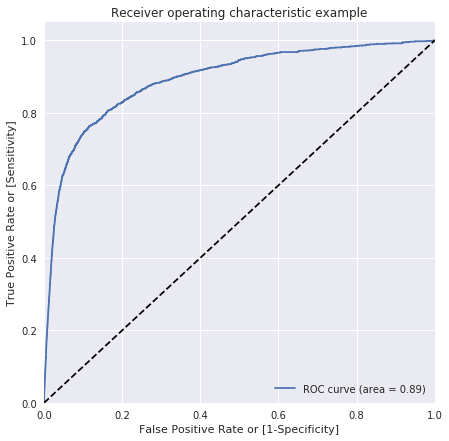

In [184]:
# Calling the function to draw ROC curve

draw_roc(y_train_pred_final.churn, y_train_pred_final.churn_Prob)

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.
- Bigger the Area Under Curve(AUC) more accurate is the test

We have good model with an AUC of 0.89

Lets find the Optimal Threshold value

### 5.1.5 Finding Optimal Threshold Value

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [185]:
# This is custom function to plot sensitivity specificity tradeoff & output a cutoff dataframe

def calc_sens_spec_tradeoff (y_train_df, actual, prob, linspacer):
    from sklearn import metrics
    y_train_pred_final_new = y_train_df.copy(deep=True)
    num_range = np.linspace(0,0.9,linspacer)
    
    for i in num_range:
        y_train_pred_final_new[str(round(i,2))]= y_train_pred_final_new[prob].map(lambda x: 1 if x > i else 0)
        y_train_pred_final_new.head()
    df_cutoff = pd.DataFrame( columns = ['Threshold','Accuracy','Sensitivity','Specificity'])
    
    for i in num_range:
        confusion = metrics.confusion_matrix(y_train_pred_final_new[actual],y_train_pred_final_new[str(round(i,2))])
        accuracy = metrics.accuracy_score(y_train_pred_final_new[actual],y_train_pred_final_new[str(round(i,2))])
        TN = confusion[0,0]
        FP = confusion[0,1]
        FN = confusion[1,0]
        TP = confusion[1,1]
        sensitivity = TP /float(TP+FN)
        specificity = TN /float (TN+FP)
        df_cutoff.loc[str(round(i,2))] =[ i ,accuracy,sensitivity,specificity]
    
    # Plot the sensitivity - specificity tradeoff
    df_cutoff.plot.line(x='Threshold', y=['Accuracy','Sensitivity','Specificity'])
    plt.title ('Sensitivity Specificity Trade off curve')
    plt.show() 
    
    return df_cutoff


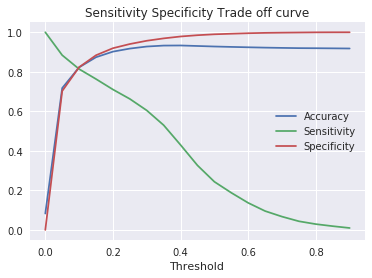

,Threshold,Accuracy,Sensitivity,Specificity
0.0,0.00,0.08,1.00,0.00
0.05,0.05,0.72,0.88,0.70
0.1,0.10,0.82,0.81,0.82
0.15,0.15,0.87,0.76,0.88
0.2,0.20,0.90,0.71,0.92
0.25,0.25,0.92,0.66,0.94
0.3,0.30,0.93,0.60,0.96
0.35,0.35,0.93,0.53,0.97
0.4,0.40,0.93,0.43,0.98
0.45,0.45,0.93,0.33,0.99


In [186]:
df_cutoff = calc_sens_spec_tradeoff(y_train_pred_final,'churn', 'churn_Prob',19 )
df_cutoff.round(2)

**Observation:** From the graph we can see that 0.1 could be the optimal threshold value for us. Lets predict the results using 0.1 as threshold

### 5.1.6 Model with optimal threshold

In [187]:
# Create a new column with optimial threshold
cut_off = 0.1
y_train_pred_final['final_predicted'] = y_train_pred_final['churn_Prob'].apply(lambda x: 1 if x>cut_off else 0)

# Output the datafram head
y_train_pred_final.head()

,churn,churn_Prob,predicted,final_predicted
0,1,0.460386,0,1
1,0,0.039759,0,0
2,0,0.021248,0,0
3,0,0.151585,0,1
4,0,0.006990,0,0


In [188]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.final_predicted )
confusion

array([[15855,  3405],
       [  324,  1416]], dtype=int64)

In [189]:
# Classification report
from sklearn.metrics import classification_report
print (classification_report(y_train_pred_final['churn'], y_train_pred_final['predicted']))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     19260
           1       0.68      0.24      0.36      1740

    accuracy                           0.93     21000
   macro avg       0.81      0.62      0.66     21000
weighted avg       0.91      0.93      0.91     21000



In [190]:
# Print Evaluation Metrics
eval_metrics_with_optimal_cutoff=calc_METRICS(y_train_pred_final['churn'], 
                          y_train_pred_final['final_predicted'], 
                          y_train_pred_final['churn_Prob'])
eval_metrics_with_optimal_cutoff.round(2)

,Evaluation Metrics,Value
0,Accuracy,0.82
1,Sensitivity,0.81
2,Specificity,0.82
3,Precision,0.29
4,Recall,0.81
5,TPR,0.81
6,FPR,0.18
7,FNR,0.19
8,Positive Predictive Value,0.29
9,Negative Predictive Value,0.98


**Observation:** The graph suggests that 0.1 as the optimal threshold value.

### 5.1.7 Making predictions on the test set

In [191]:
cut_off

0.1

In [192]:
# Retaining only variables left after feature elimination in train dataset
X_test = X_test[col]

# Adding constant to the Test Model
X_test_sm = sm.add_constant(X_test)

In [193]:
# Making predictions on test set
y_test_pred = res.predict(X_test_sm)

# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

y_test_df['index']=y_pred_1.index
y_test_df.set_index('index',inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'churn_Prob'})

y_pred_final['final_predicted'] = y_pred_final.churn_Prob.map(lambda x: 1 if x > cut_off else 0)

y_pred_final.head()

,churn,churn_Prob,final_predicted
0,0,0.003669,0
1,1,0.293118,1
2,0,0.418643,1
3,0,0.040970,0
4,0,0.041416,0


### 5.1.8 Model Evaluation on Test Data

In [194]:
# Let's take a look at the confusion matrix 
confusion = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted )
confusion

array([[6765, 1535],
       [ 132,  569]], dtype=int64)

In [195]:
# Classification report
from sklearn.metrics import classification_report
print (classification_report(y_pred_final['churn'], y_pred_final['final_predicted']))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      8300
           1       0.27      0.81      0.41       701

    accuracy                           0.81      9001
   macro avg       0.63      0.81      0.65      9001
weighted avg       0.93      0.81      0.85      9001



In [196]:
# Print Evaluation Metrics
eval_metrics_test_data=calc_METRICS(y_pred_final['churn'], 
                          y_pred_final['final_predicted'], 
                          y_pred_final['churn_Prob'])
eval_metrics_test_data.round(2)

,Evaluation Metrics,Value
0,Accuracy,0.81
1,Sensitivity,0.81
2,Specificity,0.82
3,Precision,0.27
4,Recall,0.81
5,TPR,0.81
6,FPR,0.18
7,FNR,0.19
8,Positive Predictive Value,0.27
9,Negative Predictive Value,0.98


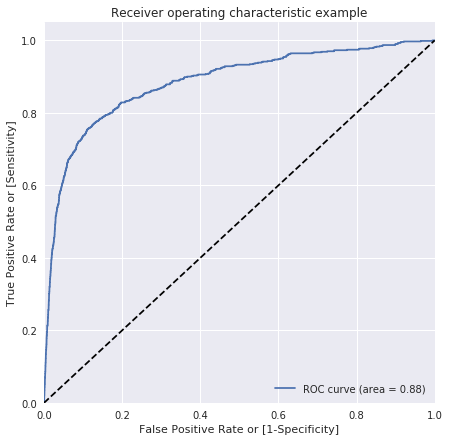

In [197]:
# Calling the function to draw ROC curve

draw_roc(y_pred_final.churn, y_pred_final.churn_Prob)

In [198]:
pd.set_option('display.max_colwidth', 0)
results = pd.DataFrame({'Model':[1],'Desc':['Logistic Regression without PCA'],'Accuracy':[round(eval_metrics_test_data['Value'][0],2)],'Sensitivity':[round(eval_metrics_test_data['Value'][1],2)],'Specificity':[round(eval_metrics_test_data['Value'][2],2)]})
results= results[['Model','Desc','Accuracy','Sensitivity','Specificity']]
results

,Model,Desc,Accuracy,Sensitivity,Specificity
0,1,Logistic Regression without PCA,0.81,0.81,0.82


## 5.2: Decision Trees

### 5.2.1: Splitting data into Test-Train datasets

In [199]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.3, random_state = 42)

### 5.2.2 Feature Scaling

In [200]:
# Scaling of  variables using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

cols = X_train.columns
sc = MinMaxScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train), columns=cols)
X_test = pd.DataFrame(sc.transform(X_test), columns=cols)

In [201]:
# Check the size of the train and test dataset for independent Variables
print (X_train.shape, X_test.shape)

(21000, 87) (9001, 87)


In [202]:
# Check the size of the train and test dataset for dependent Variables
print (y_train.shape, y_test.shape)

(21000, 1) (9001, 1)


In [203]:
y_train=y_train.values.reshape(-1,1)

### 5.2.3 Model Building

In [204]:
from sklearn.tree import DecisionTreeClassifier

dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)

dt_base.fit(X_train, y_train)

y_train_pred = dt_base.predict(X_train)
y_test_pred = dt_base.predict(X_test)

In [205]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8300
           1       0.65      0.54      0.59       701

    accuracy                           0.94      9001
   macro avg       0.81      0.76      0.78      9001
weighted avg       0.94      0.94      0.94      9001



#### Plot the ROC curve

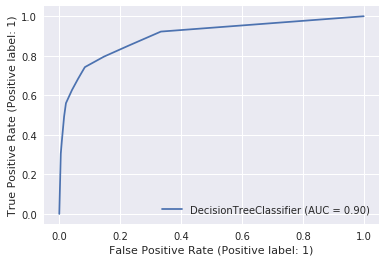

In [206]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(dt_base, X_train, y_train, drop_intermediate=False)
plt.show()

#### Hyper-parameter tuning for the Decision Tree

In [207]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=42)

params = {
    "max_depth": [2,3,4,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

grid_search.best_score_

Fitting 4 folds for each of 36 candidates, totalling 144 fits


0.9421428571428572

In [208]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [209]:
y_train_pred = dt_base.predict(X_train)
y_test_pred = dt_base.predict(X_test)

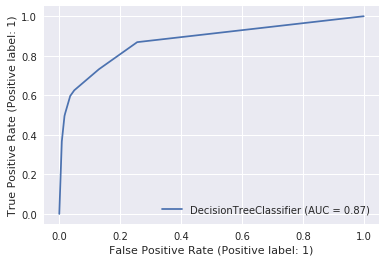

In [210]:
plot_roc_curve(dt_best, X_train, y_train)
plt.show()

In [211]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8300
           1       0.65      0.54      0.59       701

    accuracy                           0.94      9001
   macro avg       0.81      0.76      0.78      9001
weighted avg       0.94      0.94      0.94      9001



In [212]:
# Let's take a look at the confusion matrix again
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_test_pred)
confusion

array([[8095,  205],
       [ 323,  378]], dtype=int64)

In [213]:
# This is custom function to calculate various evaluation metrics of the model

def calc_METRICS_DT (actual, predicted):
    from sklearn import metrics
    # confusion matrix
    confusion = metrics.confusion_matrix(actual,predicted)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives  
    # calculate metrics
    accuracy = metrics.accuracy_score(actual,predicted)
    sensitivity = TP /float(TP+FN)
    specificity = TN /float (TN+FP)
    precision = metrics.precision_score(actual,predicted)
    recall = metrics.recall_score(actual,predicted)
    true_positive_rate = TP /float(TP+FN)
    false_positive_rate = FP /float(TN+FP)
    false_negative_rate = FN /float(TP+FN)
    positive_predictive_val = TP /float(TP+FP)
    negative_predictive_val = TN /float(TN+FN)
    f1_score = 2*(precision*recall)/(precision+recall)
   
    # create dict and assign to a dataframe
    metrics_dict = {'Accuracy': accuracy, 'Sensitivity': sensitivity, 'Specificity': specificity, 
                    'Precision': precision, 'Recall': recall, 
                    'TPR': true_positive_rate , 'FPR': false_positive_rate, 'FNR': false_negative_rate, 
                    'Positive Predictive Value': positive_predictive_val, 'Negative Predictive Value': negative_predictive_val,
                    'F1 Score': f1_score, }
    df_metrics = pd.DataFrame.from_dict(metrics_dict, orient='index')
    df_metrics.reset_index(inplace=True)
    df_metrics.rename(columns={'index': 'Evaluation Metrics', 0: 'Value'}, inplace=True)
    return df_metrics  

In [214]:
# Print Evaluation Metrics
eval_metrics_test_data=calc_METRICS_DT(y_test, y_test_pred)
eval_metrics_test_data.round(2)

,Evaluation Metrics,Value
0,Accuracy,0.94
1,Sensitivity,0.54
2,Specificity,0.98
3,Precision,0.65
4,Recall,0.54
5,TPR,0.54
6,FPR,0.02
7,FNR,0.46
8,Positive Predictive Value,0.65
9,Negative Predictive Value,0.96


In [215]:
pd.set_option('display.max_colwidth', 0)
temp= pd.DataFrame({'Model':[2],'Desc':['Decision Trees without PCA'],'Accuracy':[round(eval_metrics_test_data['Value'][0],2)],'Sensitivity':[round(eval_metrics_test_data['Value'][1],2)],'Specificity':[round(eval_metrics_test_data['Value'][2],2)]})
temp= temp[['Model','Desc','Accuracy','Sensitivity','Specificity']]
results = pd.concat([results, temp])
results

,Model,Desc,Accuracy,Sensitivity,Specificity
0,1,Logistic Regression without PCA,0.81,0.81,0.82
0,2,Decision Trees without PCA,0.94,0.54,0.98


## 5.3: Random Forest

In [216]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=4, max_features=5, random_state=100, oob_score=True,class_weight='balanced')

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4, max_features=5,
                       oob_score=True, random_state=100)

In [217]:
rf.oob_score_

0.9046190476190477

In [218]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

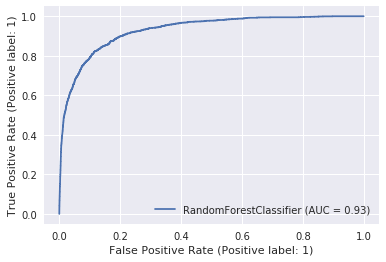

In [219]:
plot_roc_curve(rf, X_train, y_train)
plt.show()

#### Hyper-parameter tuning for the Random Forest

In [220]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1,class_weight='balanced')

params = {
    'max_depth': [2,5,10,20],
    'min_samples_leaf': [5,20,50,100,200],
    'n_estimators': [10, 50, 100],
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 20],
                         'min_samples_leaf': [5, 20, 50, 100, 200],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy', verbose=1)

In [221]:
grid_search.best_score_

0.9418095238095239

In [222]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=5, n_estimators=50, n_jobs=-1,
                       random_state=42)

In [223]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

In [224]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8300
           1       0.63      0.62      0.63       701

    accuracy                           0.94      9001
   macro avg       0.80      0.80      0.80      9001
weighted avg       0.94      0.94      0.94      9001



In [225]:
# Let's take a look at the confusion matrix again
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_test_pred)
confusion

array([[8048,  252],
       [ 264,  437]], dtype=int64)

In [226]:
# Print Evaluation Metrics
eval_metrics_test_data=calc_METRICS_DT(y_test, y_test_pred)
eval_metrics_test_data.round(2)

,Evaluation Metrics,Value
0,Accuracy,0.94
1,Sensitivity,0.62
2,Specificity,0.97
3,Precision,0.63
4,Recall,0.62
5,TPR,0.62
6,FPR,0.03
7,FNR,0.38
8,Positive Predictive Value,0.63
9,Negative Predictive Value,0.97


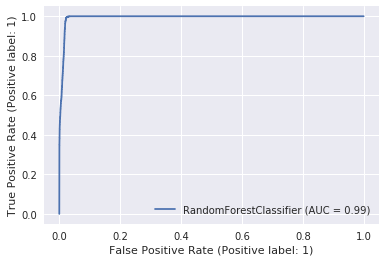

In [227]:
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

In [228]:
pd.set_option('display.max_colwidth', 0)
temp= pd.DataFrame({'Model':[3],'Desc':['Random Forest without PCA'],'Accuracy':[round(eval_metrics_test_data['Value'][0],2)],'Sensitivity':[round(eval_metrics_test_data['Value'][1],2)],'Specificity':[round(eval_metrics_test_data['Value'][2],2)]})
temp= temp[['Model','Desc','Accuracy','Sensitivity','Specificity']]
results = pd.concat([results, temp])
results

,Model,Desc,Accuracy,Sensitivity,Specificity
0,1,Logistic Regression without PCA,0.81,0.81,0.82
0,2,Decision Trees without PCA,0.94,0.54,0.98
0,3,Random Forest without PCA,0.94,0.62,0.97


In [229]:
# Extraction of feature importance
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_*100
})

imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
26,total_ic_mou_8,7.895869
18,loc_ic_t2t_mou_8,7.058274
21,loc_ic_mou_8,6.713711
19,loc_ic_t2m_mou_8,4.585730
17,total_og_mou_8,3.749827
...,...,...
56,std_og_t2f_mou_avg_67,0.156288
83,count_rech_2g_and_3g_avg_67,0.146952
85,monthly_2g_and_3g_avg_67,0.084810
12,std_og_t2f_mou_8,0.061596


## 5.4: Important Features

### 5.4.1 Important Features - Logistic Regression

In [230]:
#Final Model parameters
round(res.params,3).sort_values(ascending=False)

sachet_2g_and_3g_avg_67    6.033 
arpu_avg_67                3.396 
total_ic_mou_avg_67        2.533 
const                     -1.355 
spl_ic_mou_8              -2.481 
loc_og_t2m_mou_8          -2.987 
total_rech_data_8         -3.044 
std_ic_mou_8              -3.172 
vol_2g_and_3g_mb_8        -3.675 
loc_ic_mou_8              -10.069
total_rech_num_8          -15.261
last_day_rch_amt_8        -18.466
dtype: float64

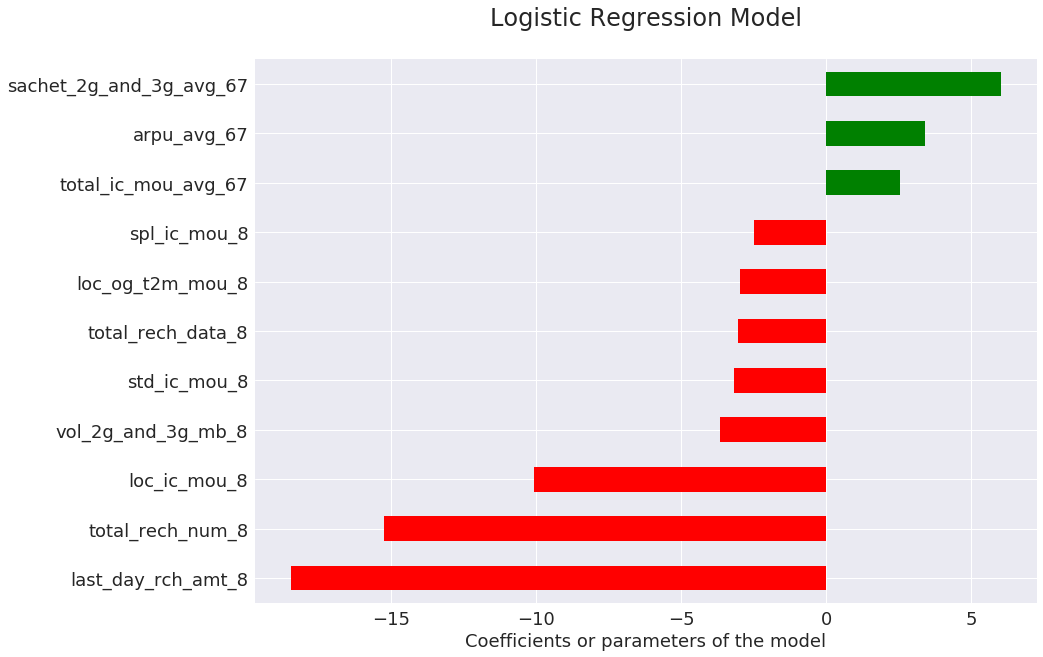

In [231]:
#Final Model parameters Bar Chart

par_series = round(res.params[1:],3).sort_values(ascending = True)
y = np.array(par_series)
cc=['colors']*len(y)
for n,val in enumerate(y):
    if val<0:
        cc[n]='red'
    elif val>=0:
        cc[n]='green'
        
plt.figure(figsize = [14,10])
par_series.plot.barh(color = cc)
plt.title('Logistic Regression Model\n', fontsize= 24)
plt.yticks(fontsize= 18)
plt.xticks(fontsize= 18)
plt.xlabel('Coefficients or parameters of the model', fontsize= 18)
plt.show()

### 5.4.2 Important Features - Random Forests

In [232]:
#Top-11 Features as per Random Forests
imp_df.sort_values(by="Imp", ascending=False).head(11)

,Varname,Imp
26,total_ic_mou_8,7.895869
18,loc_ic_t2t_mou_8,7.058274
21,loc_ic_mou_8,6.713711
19,loc_ic_t2m_mou_8,4.585730
17,total_og_mou_8,3.749827
5,loc_og_t2t_mou_8,3.601043
39,remaining_days_after_last_rech_8,3.559303
33,last_day_rch_amt_8,3.399971
9,loc_og_mou_8,2.981915
4,roam_og_mou_8,2.768093


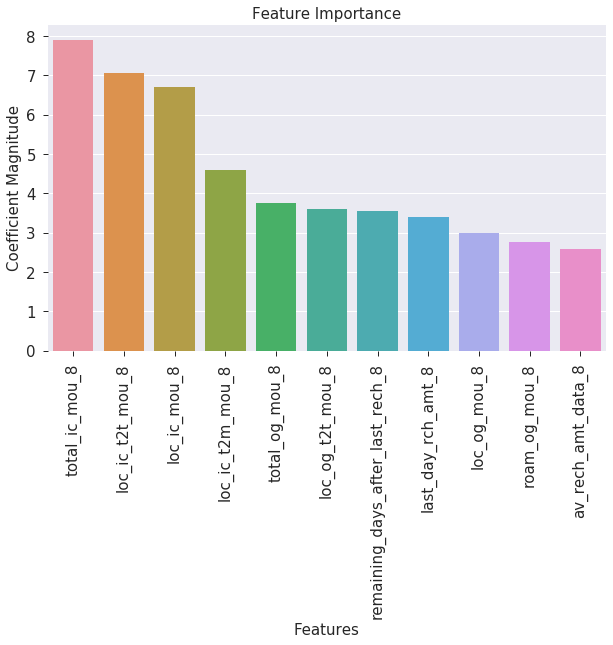

In [233]:
#Plot to show the feature importance
plt.figure(figsize=[10,6])
sns.barplot(x = "Varname",y="Imp",data=imp_df.sort_values(by="Imp", ascending=False).head(11))
plt.title("Feature Importance",size=15)
plt.xticks(rotation="vertical")
plt.ylabel("Coefficient Magnitude",size=15)
plt.xlabel("Features",size=15)
plt.tick_params(size=5,labelsize = 15) # Tick size in both X and Y axes
plt.show()

## 6: Conclusions and Recommendations

To predict churn amongst high value customers, three new features were derived: 
- Remaining Days in the month since last recharge
- Sum of 2g and 3g to look at net internet footprint on the network.
- Mean of relevant columns during the good phase i.e. 6 & 7. Therefore we have one set of columns for the good phase and another set of columns for action phase.

### Goal-1: Churn Prediction

**Six Models were built before concluding on the high performance model for Churn Prediction**

In [234]:
# Summary of Models for Churn Prediction 
round(metrics_result_df,2)

,Model,AUC,Accuracy,F1 Score,Precision,Recall & Sensitivity
0,"1: PCA, Logistic, Class Weight Balanced",0.889,0.78,0.38,0.24,0.86
1,"2: PCA, Logistic, Hyper Parameter Tuned",0.892,0.78,0.37,0.24,0.85
2,"3: RandomUnderSampler, PCA, Logistic, Hyper Parameter Tuned",0.888,0.78,0.38,0.24,0.85
3,"4: RandomOverSampler, PCA, Logistic, Hyper Parameter Tuned",0.888,0.79,0.38,0.25,0.84
4,"5: SMOTE, PCA, Logistic, Hyper Parameter Tuned",0.887,0.80,0.39,0.25,0.84
5,"6: PCA, RandomForest, Hyper Parameter Tuned, Class Weight Balanced",NA,0.88,0.48,0.36,0.75


**High Performance Model for Churn Prediction:**

- Model 1
- PCA preceeded by MinMaxScaler
- Logistic Regression with threshold of 0.45
- feature_count_PCA = 25
- class_weight='balanced'

In [235]:
# Metrics of Model for Churn Prediction

round(metrics_result_df[metrics_result_df.index==0],2)

,Model,AUC,Accuracy,F1 Score,Precision,Recall & Sensitivity
0,"1: PCA, Logistic, Class Weight Balanced",0.889,0.78,0.38,0.24,0.86


**Churn Prediction: We are getting a recall & senstivity of 86%**

### Goal-2: Identify important predictor variables

**Three Models were built to identify feature importances**

In [236]:
# Summary
results

,Model,Desc,Accuracy,Sensitivity,Specificity
0,1,Logistic Regression without PCA,0.81,0.81,0.82
0,2,Decision Trees without PCA,0.94,0.54,0.98
0,3,Random Forest without PCA,0.94,0.62,0.97


**Best interpretable Model for feature importances:**

In [237]:
# Best model to predict churn without PCA
round(results[results.Model==1],2)

,Model,Desc,Accuracy,Sensitivity,Specificity
0,1,Logistic Regression without PCA,0.81,0.81,0.82


**Top-10 Features**

1. In this section unlike PCA, all features are considered. Logistic regression, Decision trees and Random forests were tried with hyper parameter tuning.<br>  

2. Logistic regression yielded better result with a sensitivity of 82% on test data<br>  
    
Top 10 Features which are important based on Logistic regression are

1. last_day_rch_amt_8
2. total_rech_num_8
3. loc_ic_mou_8
4. sachet_2g_and_3g_avg_67
5. vol_2g_and_3g_mb_8
6. arpu_avg_67
7. std_ic_mou_8
8. total_rech_data_8
9. loc_og_t2m_mou_8
10. total_ic_mou_avg_67

**Using the interpretable model, the following are the actionable recommendations and inferences for the business**

1. Last Day Recharge in the 8th month helps in predicting churners very well. Higher these numbers lower is the probability that customer will churn. Focus on the customers who have less recharges or no recharges in the last days with some special offers to retain them.

2. Number of total recharges in the 8th month help in predicting churners very well. Higher the total recharges in 8th month, lower is the probability that customer will churn. Focus on customers who have recharged less in the last months. Try to retain them with special offers

3. Local Incoming Calls usage in the 8th month will help in predicting churners very well. Higher these numbers are lower is the probability that customer will churn. However customers with Incoming Calls usage may or may not help Operator much. There would be some kind of customers who will not churn but use only incoming services which would not bring any revenue to the operator. Such customers need to be assessed through other features to decide the action to retain them or to neglect them altogether.

4. Average Recharges of 2g and 3g, Total incoming minutes of usage and Average revenue per user for the 6th and 7th months  contribute positively towards predicting probability of a customer being churner. Higher these numbers are higher are the chance that customer will churn.

5. Higher the 2g and 3g data volumes usage and total data recharge in the 8th month lower is the chance that customer will churn. Concentrate on the customers whose data usage as well as recharge is lower with some special offers to retain them.

6. Higher the STD incoming calls (in minutes) in the 8th month lower is the chance that customer will churn. Again these could be such customers who doesn't bring any revenue to the operator. May be people living in some distant villages for whome only use of mobile phone is to receive calls from their kins working in far away places. After assessing other features, we can ignore such customers if they aren't bringing any revenue to the operator. 

7. Higher the local outgoing calls to mobiles from other operators in the 8th month lower is the chance that customer will churn

`Submission Ganesh Nagappa Shetty and Harish Dave`